# How The Number of Hours Worked Differs Based on a Person's Marital Status, Education and Workclass

Siddharth Nand    
Charul Maheshka    
Winston ONG    
Simon Liang    

<hr style="opacity: 0.3" />

# Introduction

Work is an important factor of many adult lives. Various aspects of our lives revolve around the time we spend at work everyday, but what determines the how much we work per week? 

We are interested in the factors that impact number of hours worked per week. We posed the research question: **Does level of education, marital status, or 'workclass' (publicly employed, privately employed, self-employed, or volunteer) impact number of hours worked per week?** 

Past research has shown that long working hours can actually lead to changes in marital status: Working more than 60 hours a week leads to a higher risk of divorce or separation in females in Korea (Kim et al, 2019; Kim, Lee and Lee, 2021). However, this research is often limited by focusing on a specific country, preventing results from being generalizable more broadly. There is also a lack of research studying a bigger range of variables that can impact hours worked per week. 

To answer this question, we have chosen a data set known as the “Adult” or “Census Income” data set from the 1994 Census database, that includes data from 48,842 people from different countries on the measures that we are interested in: workclass, level of education, marital status and hours worked per week. We will be answering our question by first looking at the mean and standard deviation of hours worked per week and how it differs based on these categorical variables.

# Preliminary Results

In [1]:
library(tidyverse)
library(readxl)
library(infer)
library(repr)
library(cowplot)
library(broom)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Load Data

In [2]:
download.file("https://github.com/SimonYYL/STAT-201-Group-project/raw/main/adult.xlsx","adult.xlsx")
raw <- read_xlsx("adult.xlsx")

**Raw Dataset**

In [3]:
head(raw)

age,work_class,id,education,marital_status,occupation,relationship,ethnicity,sex,capital-gain,capital-loss,hours_per_week,country,income_group
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
56,Private,169133,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,<=50K
25,Private,191230,Some-college,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,Yugoslavia,<=50K
20,Private,175069,Some-college,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,<=50K
35,Private,164526,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,>50K
40,Local-gov,183096,9th,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K
31,Private,182177,Bachelors,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,<=50K


<center><em>Table 1: Raw Adult Dataset</em></center>

### Clean and Wrangle Data

To clean and wrangle our data, we are going to:

1. Select the relevant columns for our question

2. Regroup some of our categories

    This dataset differentiates between the highest highschool, middleschool or elementary grade a person has completed or preschool. We will be grouping those observations into one education category called "Less-than-HS".

**1. Select Columns**

In [4]:
data <- raw %>%
    select(work_class, education, marital_status, hours_per_week)

In [5]:
head(data)

work_class,education,marital_status,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Private,HS-grad,Married-civ-spouse,50
Private,Some-college,Never-married,40
Private,Some-college,Never-married,40
Private,HS-grad,Married-civ-spouse,40
Local-gov,9th,Married-civ-spouse,40
Private,Bachelors,Married-civ-spouse,40


<center><em>Table 2: Relevent Columns Dataset</em></center>

**2. Regroup**

This is a table showing the different labels in the education category. You can see that the data collector has differentiated between the various highschool grades, as well as preschool

**Frequency Table of Education**

In [6]:
raw %>%
    select(education) %>%
    group_by(education) %>%
    summarise(n = n())

education,n
<chr>,<int>
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


<center><em>Table 3: Frequency Dataset of Education Column</em></center>

This is our regrouped column. You can see the new "Less-than-HS" label

**Regrouped Frequency Table of Education**

In [7]:
data$education[data$education == "10th" |
          data$education == "11th" |
          data$education == "12th" |
          data$education == "1st-4th" |
          data$education == "5th-6th" |
          data$education == "7th-8th" |
          data$education == "9th" |
          data$education == "Preschool"] = "Less_than_HS"

data %>%
    select(education) %>%
    group_by(education) %>%
    summarise(n = n())

education,n
<chr>,<int>
Assoc-acdm,1067
Assoc-voc,1382
Bachelors,5355
Doctorate,413
HS-grad,10501
Less_than_HS,4253
Masters,1723
Prof-school,576
Some-college,7291


<center><em>Table 4: Frequency Dataset of Regrouped Education Column</em></center>

**Final Dataframe**

In [8]:
head(data)

work_class,education,marital_status,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Private,HS-grad,Married-civ-spouse,50
Private,Some-college,Never-married,40
Private,Some-college,Never-married,40
Private,HS-grad,Married-civ-spouse,40
Local-gov,Less_than_HS,Married-civ-spouse,40
Private,Bachelors,Married-civ-spouse,40


<center><em>Table 5: Dataset Being Used in this Report</em></center>

### Broad Overview of Data

This section has relevent plots that will allow us address our question more effectively. To visualize our data, we decided to start with a frequency distriubution of hours worked per week and then boxplots of each of our 3 categorical variables.

Our expectation is that across the whole dataset, a frequency distribution of hours per week worked vs the number of people that work those hours has about 50% of the observations close to 40hrs and the other 50% spread out decreasingly towards the ends.

For the boxplots of the workclass category, we expect self employed and private sector workers to work more hours compared to public sector workers. This is because self employed people have full responsibility for paying themselves and so would put in more hours to ensure they make enough. For private sector vs public sector, we think public sector workers work less hours because there is less pressure due to not needing to meet corporate earnings goals and performance expectations from higher managements.

For the boxplots of the education category, we expect people that are more educated tend to work more hours because they tend to enjoy their field of work more compared to less educated people, this is especially true for people of higher education who most likely would put their work above leisurely activities.

For the boxplots of the marital status category, we expect that individuals that are not married generally work more hours compared to those that are married because married people would require more time with their families.

In [8]:
# ---------- Configurations for our plots ------------------

options(repr.plot.width = 20, repr.plot.height = 8)

plot_config <- theme_classic() +
                theme(plot.title = element_text(hjust = 0.5),
                      legend.position="none",
                      panel.spacing = unit(0.1, "lines"),
                      strip.text.x = element_text(size = 8),
                      panel.spacing.x = unit(0.75, "cm"),
                      text = element_text(size = 20))
                      
boxplot_scale <- scale_y_continuous(breaks = seq(0, 100, 10))

workclass_labels <- scale_x_discrete(labels = c("Unknown", "Federal Gov.", "Local Gov.",
                                "Never Worked", "Private", "Self Employed \n(Corporation)", "Self Employed",
                                "State Government", "Without Pay"))
                                
education_labels <- scale_x_discrete(labels = c("Associates", "Associates \nVocational School", "Bachelors",
                                "Doctorate", "Highschool \nGraduate", "Not Highschool \nGraduate",
                                "Masters", "Professional \nSchool", "Some College"))
                                
marital_status_labels <- scale_x_discrete(labels = c("Divorced", "Married Spouse \nIn Armed Forces", "Married",
                                                     "Married Spouse \nAbsent",
                                                     "Never Married", "Seperated", "Widowed"))

In [10]:
hrs_per_week_all <- data %>% ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5) +
    xlab("Hours Per Week") +
    ylab("Count") +
    ggtitle("Frequency Disribution of Hours per Week Worked for Everyone") +
    plot_config +
    scale_y_continuous(breaks = seq(0, 30000, 2000)) +
    scale_x_continuous(breaks = seq(0, 110, 10))

hrs_per_week_workclass <- data %>%
    ggplot(aes(x = work_class, y = hours_per_week, color = work_class)) +
    geom_boxplot() +
    xlab("Workclass") +
    ylab("Hours per Week") +
    ggtitle("Hours per Week Worked Based on Workclass") +
    plot_config +
    boxplot_scale +
    workclass_labels

hrs_per_week_education <- data %>%
    ggplot(aes(x = education, y = hours_per_week, color = education)) +
    geom_boxplot() +
    xlab("Education") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Education") +
    plot_config +
    boxplot_scale +
    education_labels

hrs_per_week_marital_status <- data %>%
    ggplot(aes(x = marital_status, y = hours_per_week, color = marital_status)) +
    geom_boxplot() +
    xlab("Marital Status") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Marital Status") +
    plot_config +
    boxplot_scale +
    marital_status_labels

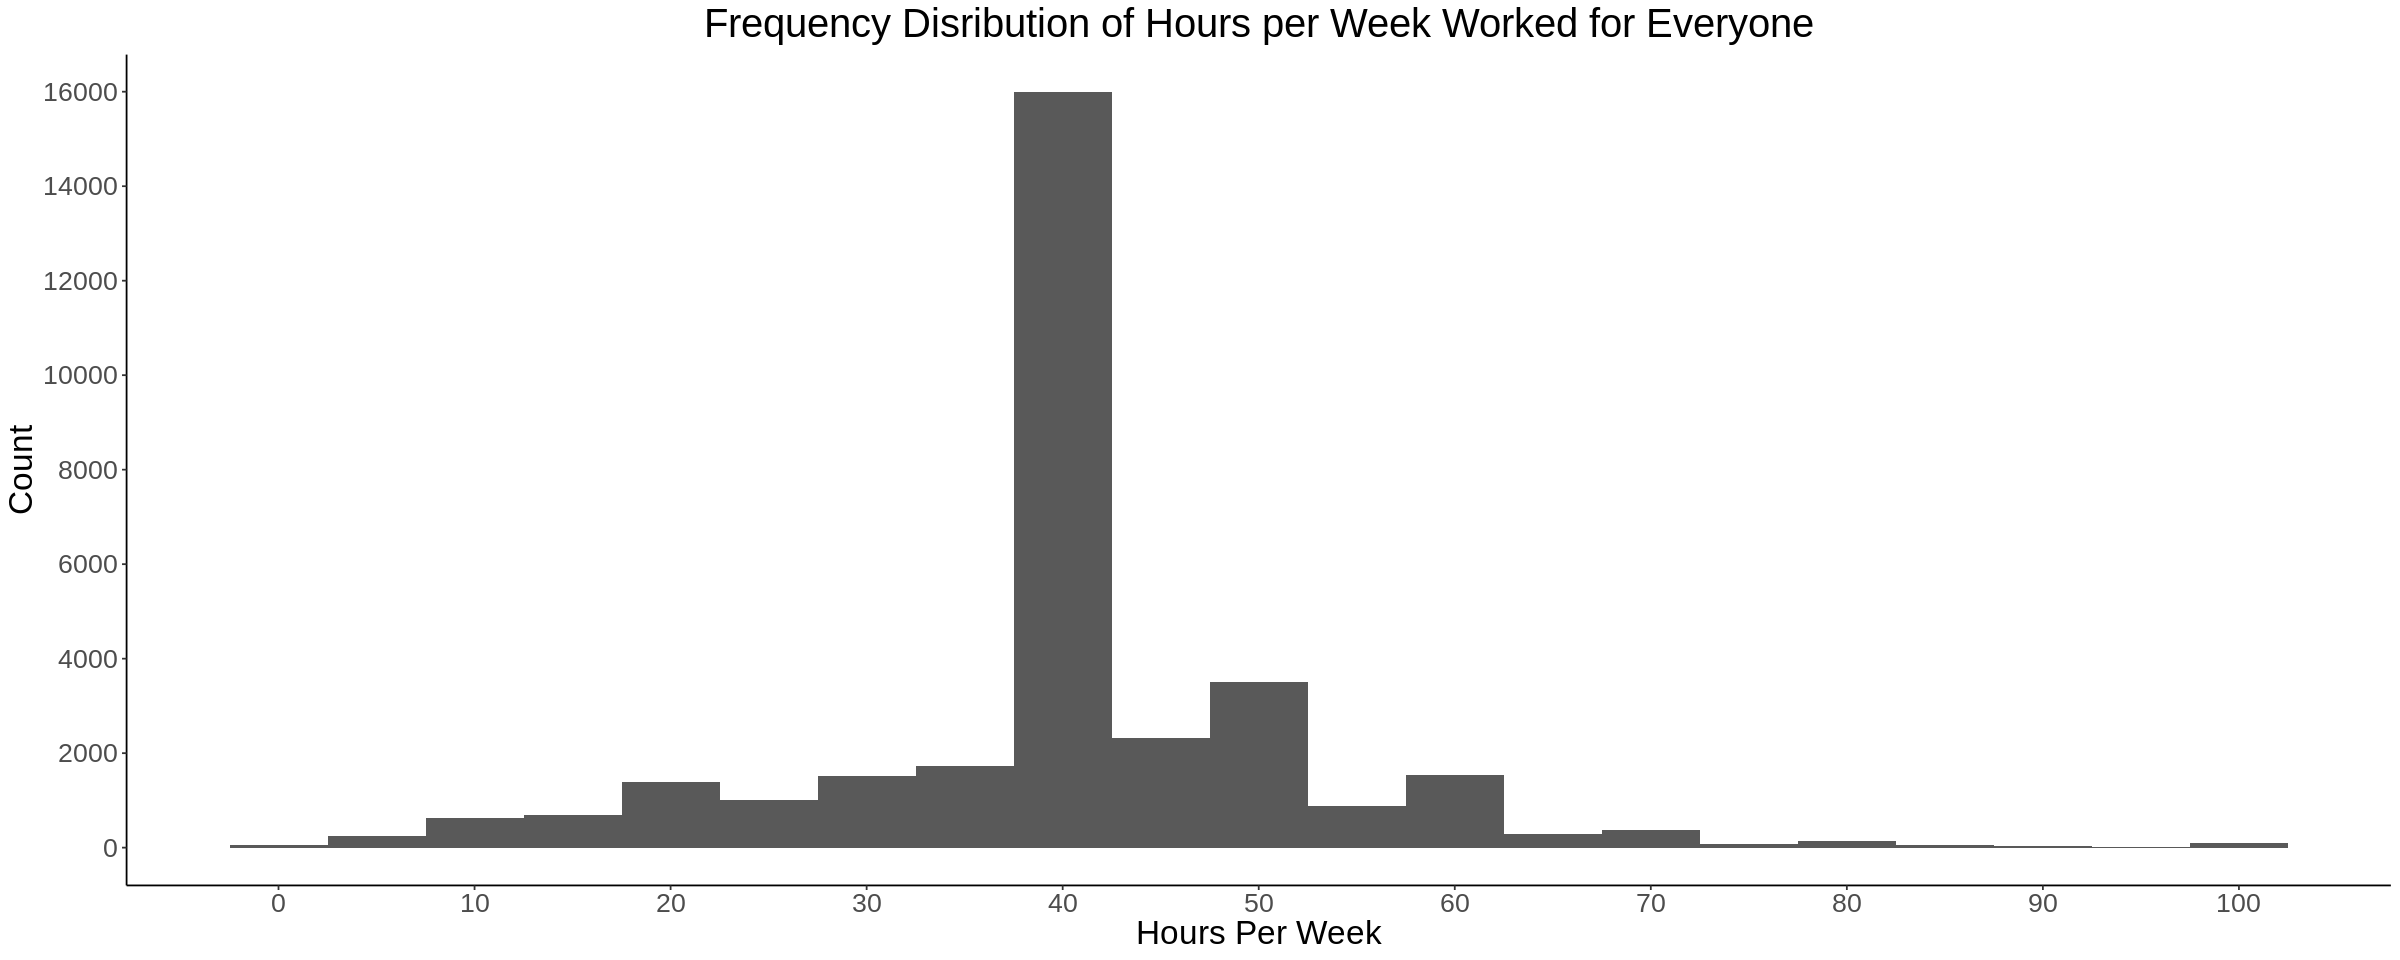

In [11]:
hrs_per_week_all

<center><em>Figure 1: Frequency Distrubution of Data</em></center>

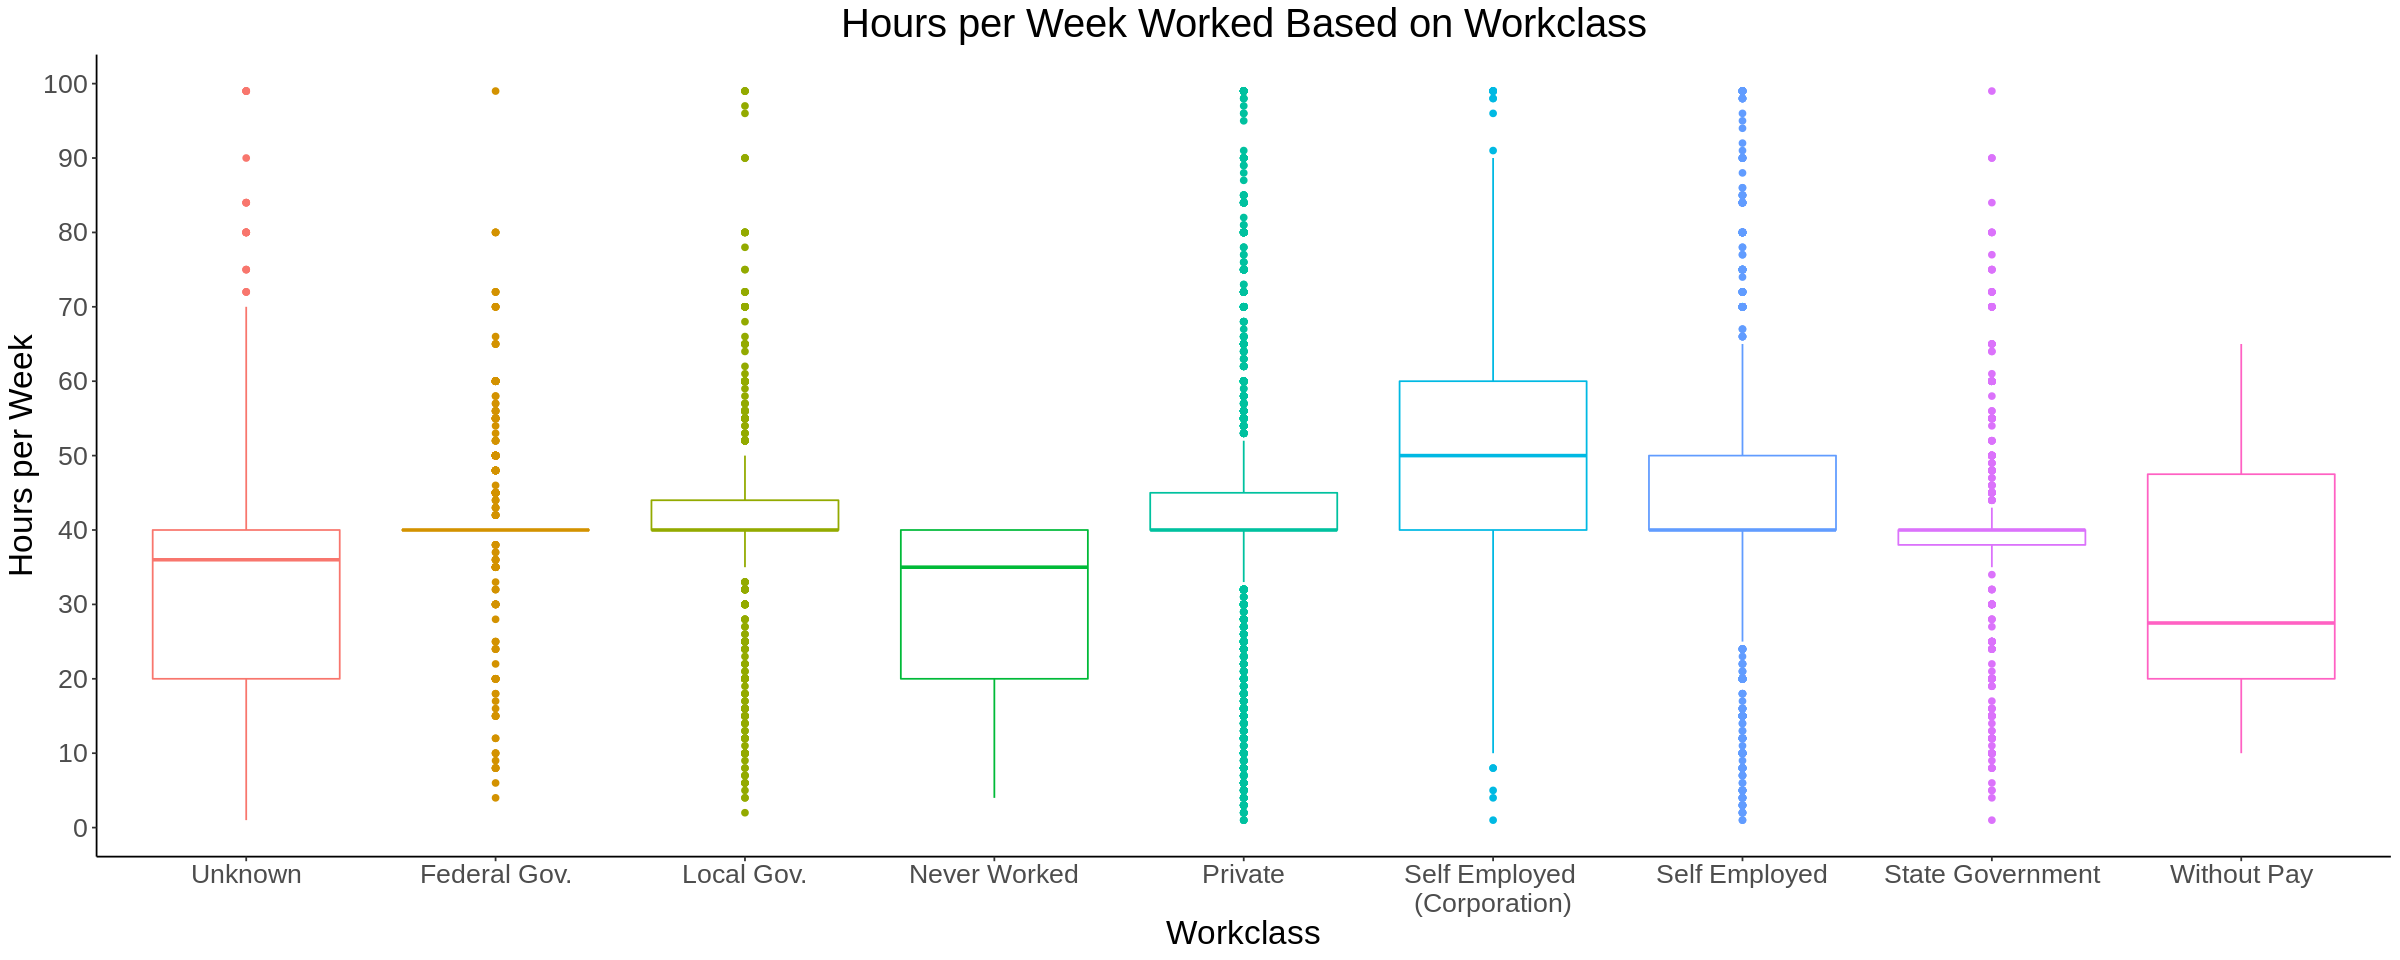

In [12]:
hrs_per_week_workclass

<center><em>Figure 2: Boxplot of Workclass</em></center>

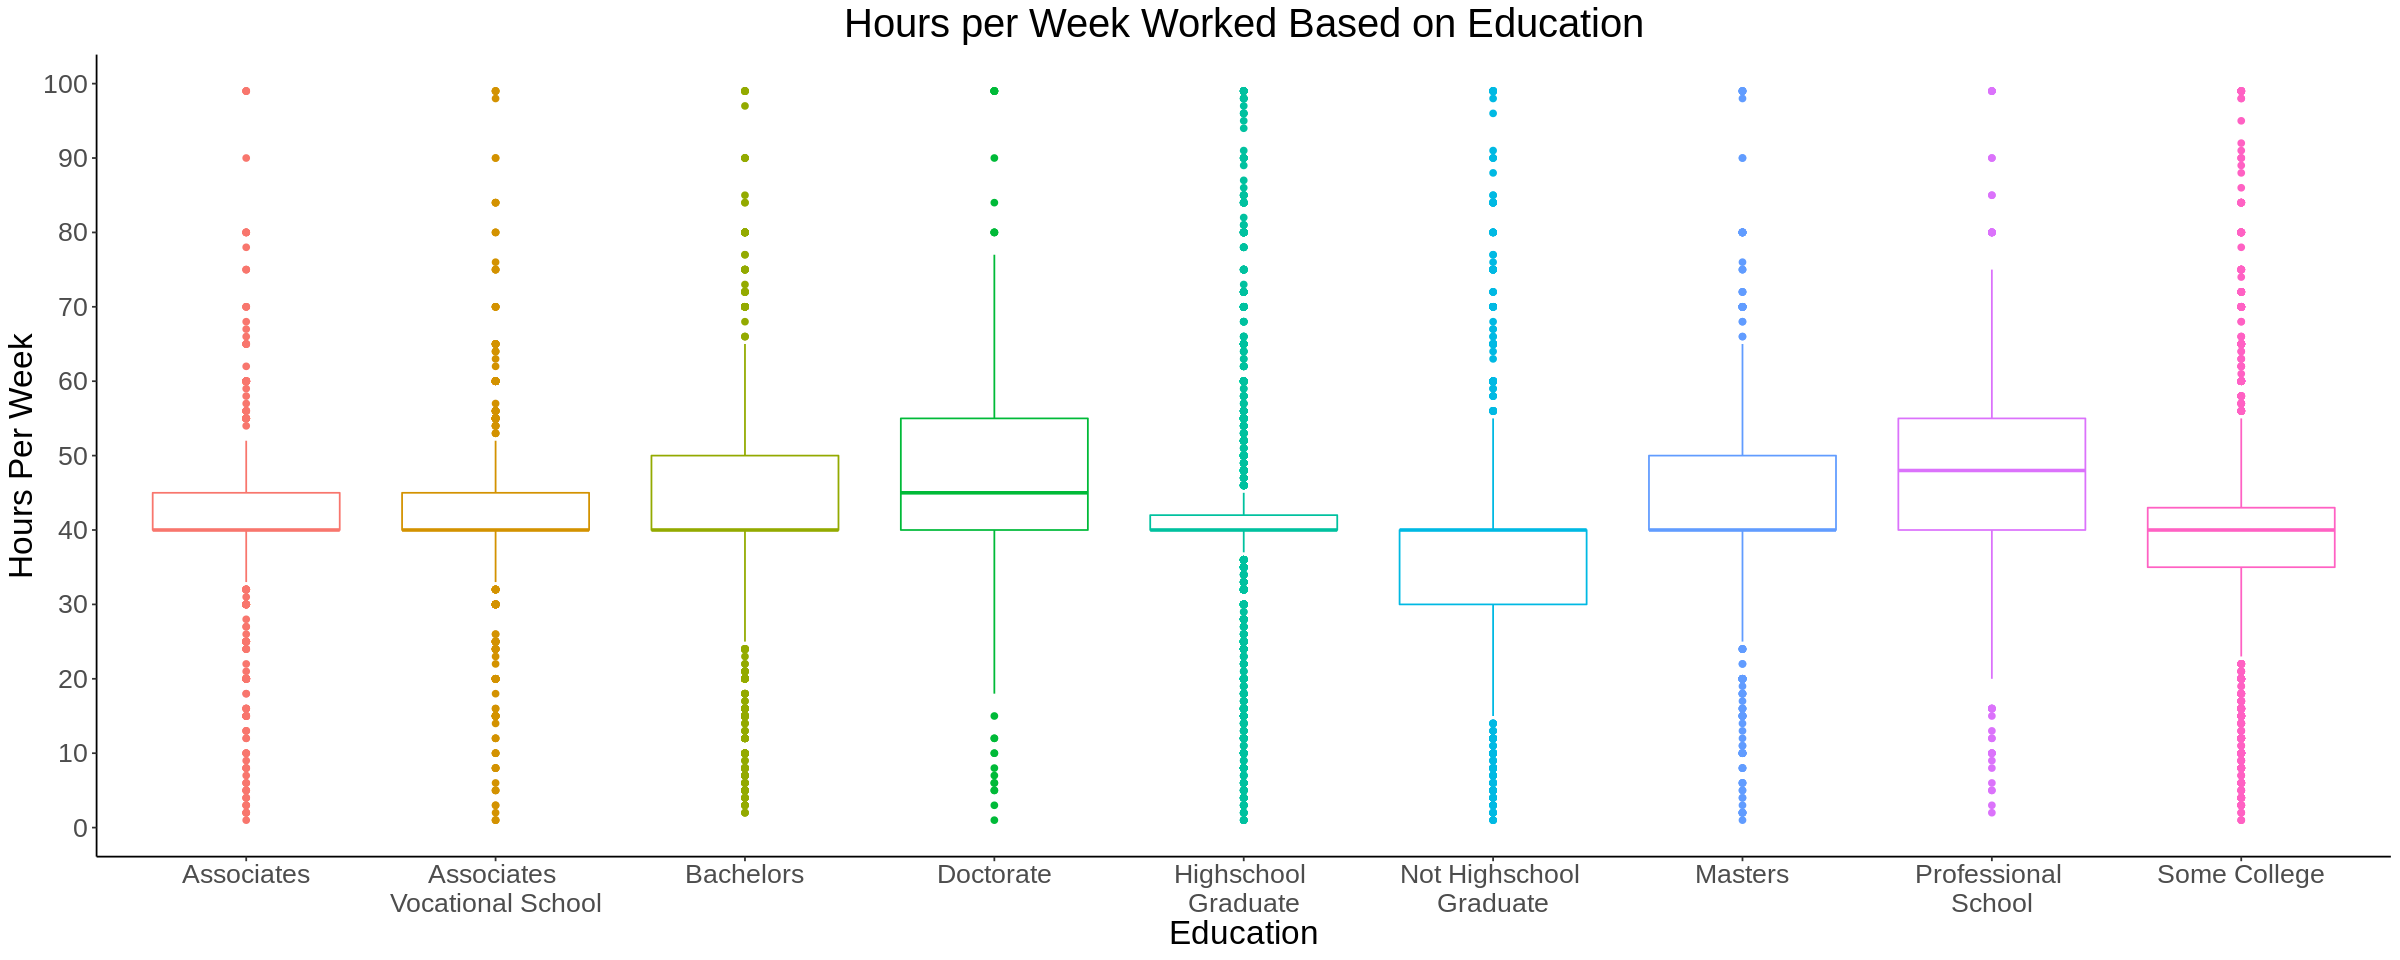

In [13]:
hrs_per_week_education

<center><em>Figure 3: Boxplot of Education</em></center>

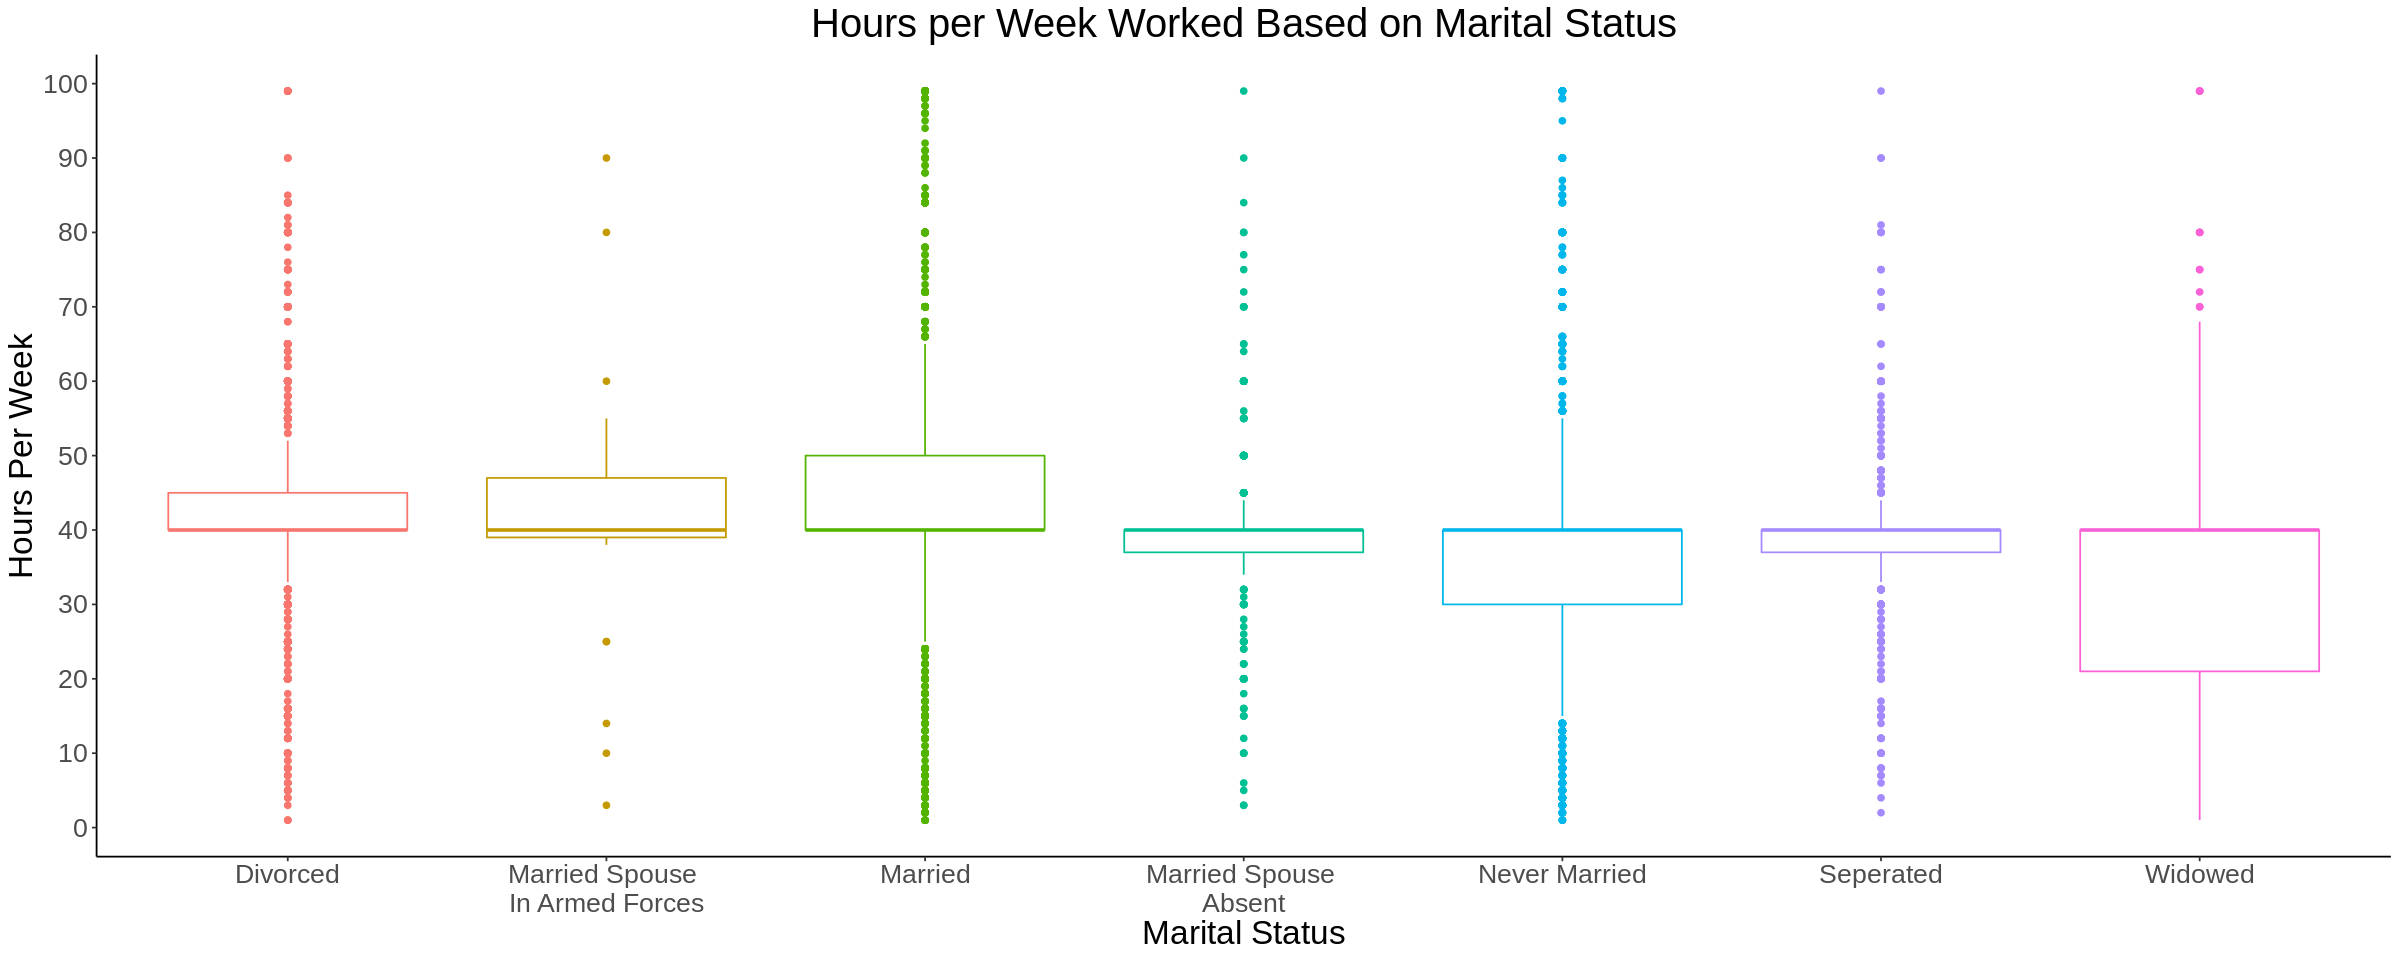

In [14]:
hrs_per_week_marital_status

<center><em>Figure 4: Boxplot of Marital Status</em></center>

### Statistics of Our Dataset

In [15]:
hrs_work_class <- data %>%
    group_by(work_class) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_education <- data %>%
    group_by(education) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_marital_status <- data %>%
    group_by(marital_status) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

**Mean Hours Worked Based on Workclass and Standard Deviation**

In [16]:
hrs_work_class

work_class,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
?,31.91939,14.909903
Federal-gov,41.37917,8.838605
Local-gov,40.98280,10.771559
Never-worked,28.42857,15.186147
Private,40.26710,11.256298
Self-emp-inc,48.81810,13.900417
Self-emp-not-inc,44.42188,16.674958
State-gov,39.03159,11.697014
Without-pay,32.71429,17.357900


<center><em>Table 6: Table of Summary Statistics for Workclass</em></center>

**Mean Hours Worked Based on Education Level and Standard Deviation**

In [17]:
hrs_education

education,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
Assoc-acdm,40.50422,12.19667
Assoc-voc,41.61071,10.79338
Bachelors,42.61401,11.44619
Doctorate,46.97337,15.08445
HS-grad,40.57537,11.33376
Less_than_HS,36.71785,13.34644
Masters,43.83633,12.27780
Prof-school,47.42535,14.80604
Some-college,38.85228,12.76190


<center><em>Table 7: Table of Summary Statistics for Education</em></center>

**Mean Hours Worked Based on Marital Status and Standard Deviation**

In [18]:
hrs_marital_status

marital_status,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
Divorced,41.24668,10.67663
Married-AF-spouse,41.13043,19.44060
Married-civ-spouse,43.28486,11.90505
Married-spouse-absent,39.66986,11.76737
Never-married,36.94000,12.43254
Separated,39.30146,10.37753
Widowed,32.97986,14.05869


<center><em>Table 8: Table of Summary Statistics for Marital Status</em></center>

In [19]:
bar_means_hrs_work_class <- hrs_work_class %>%
    ggplot(aes(x = work_class, y = mean_hours_per_week, fill = work_class)) +
    geom_bar(stat = "identity") +
    xlab("Work Class") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Work Class") +
    plot_config +
    workclass_labels

bar_means_hrs_education <- hrs_education %>%
    ggplot(aes(x = education, y = mean_hours_per_week, fill = education)) +
    geom_bar(stat = "identity") +
    xlab("Education Level") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Education Level") +
    plot_config +
    education_labels

bar_means_marital_status <- hrs_marital_status %>%
    ggplot(aes(x = marital_status, y = mean_hours_per_week, fill = marital_status)) +
    geom_bar(stat = "identity") +
    xlab("Marital Status") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked Based on Marital Status") +
    plot_config +
    marital_status_labels

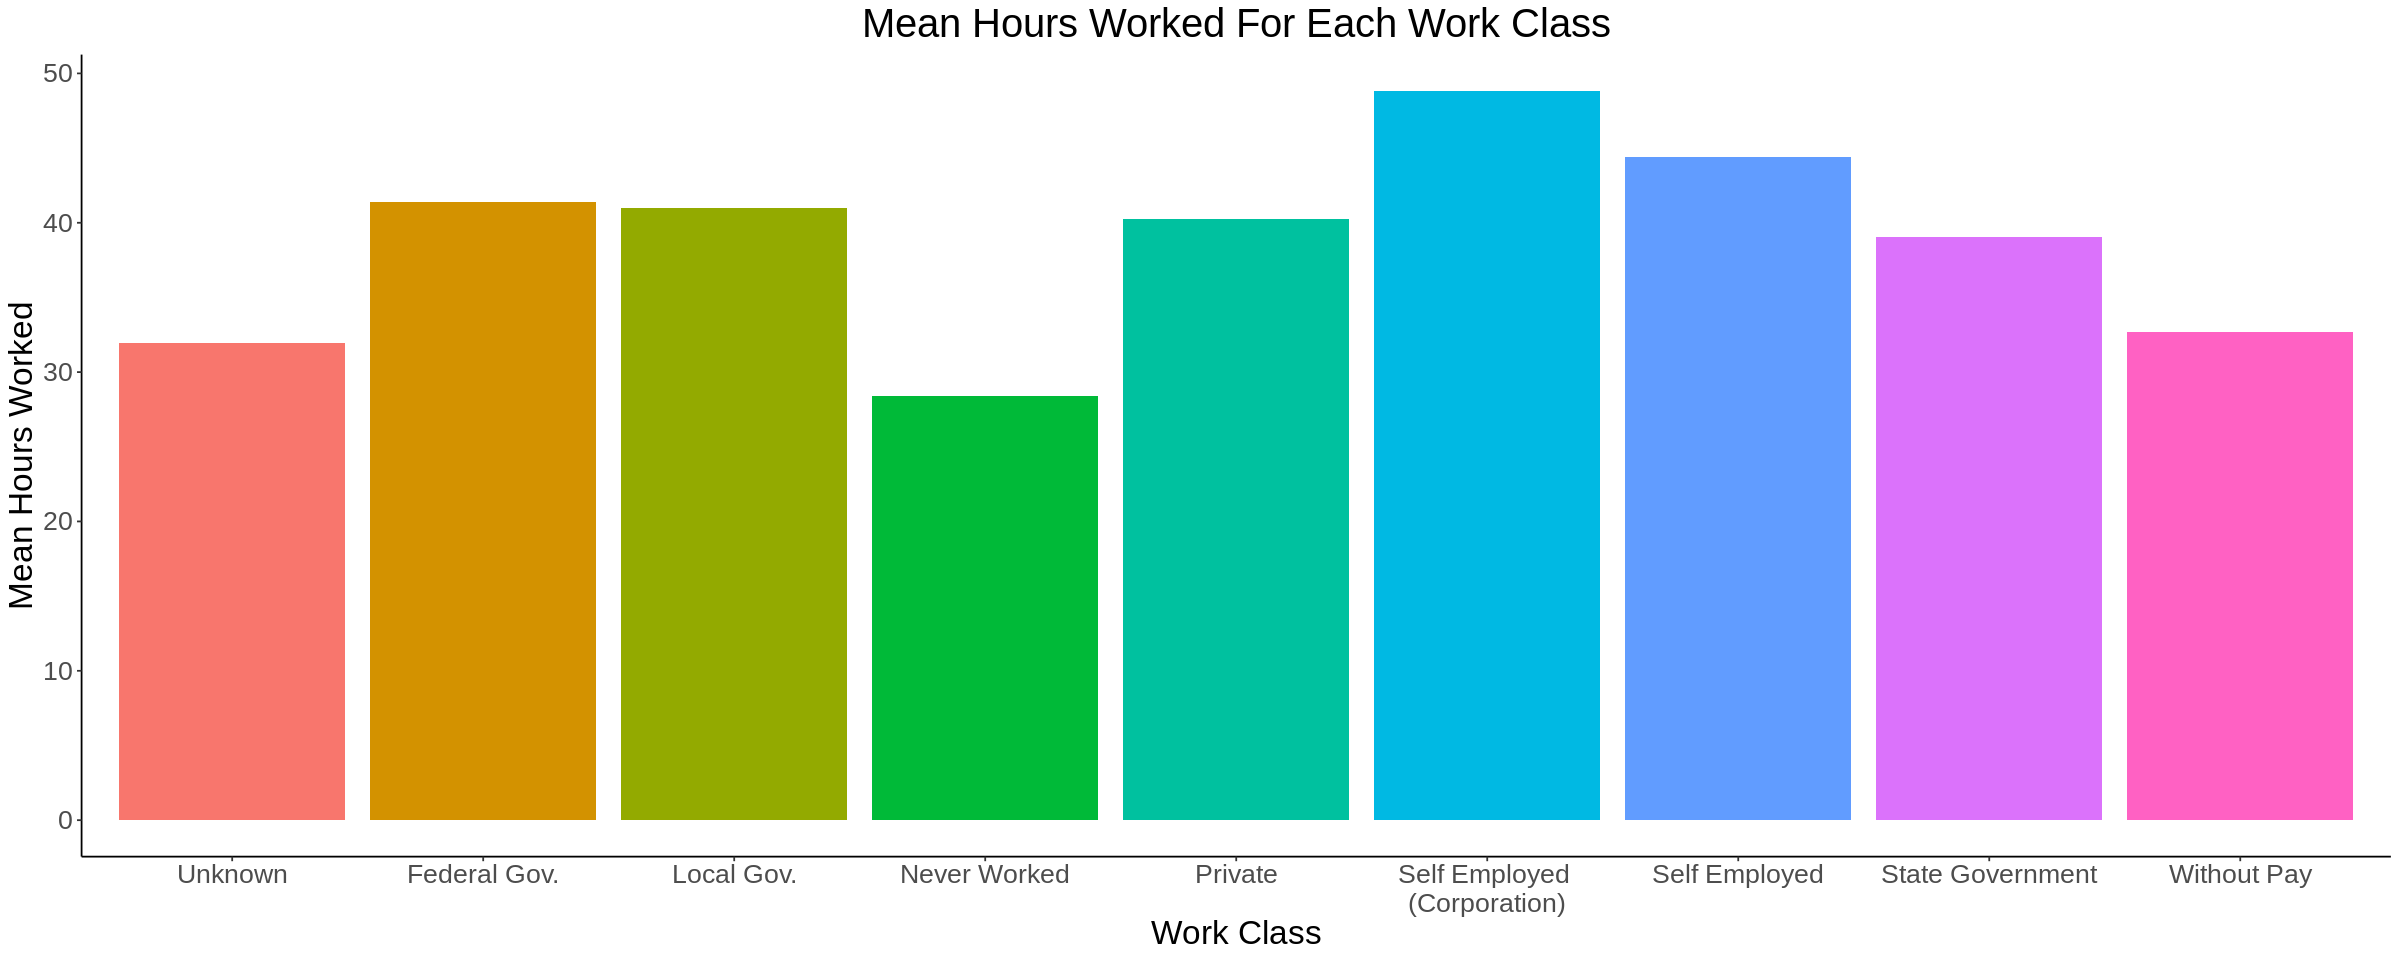

In [20]:
bar_means_hrs_work_class

<center><em>Figure 5: Bar-graph of Workclass</em></center>

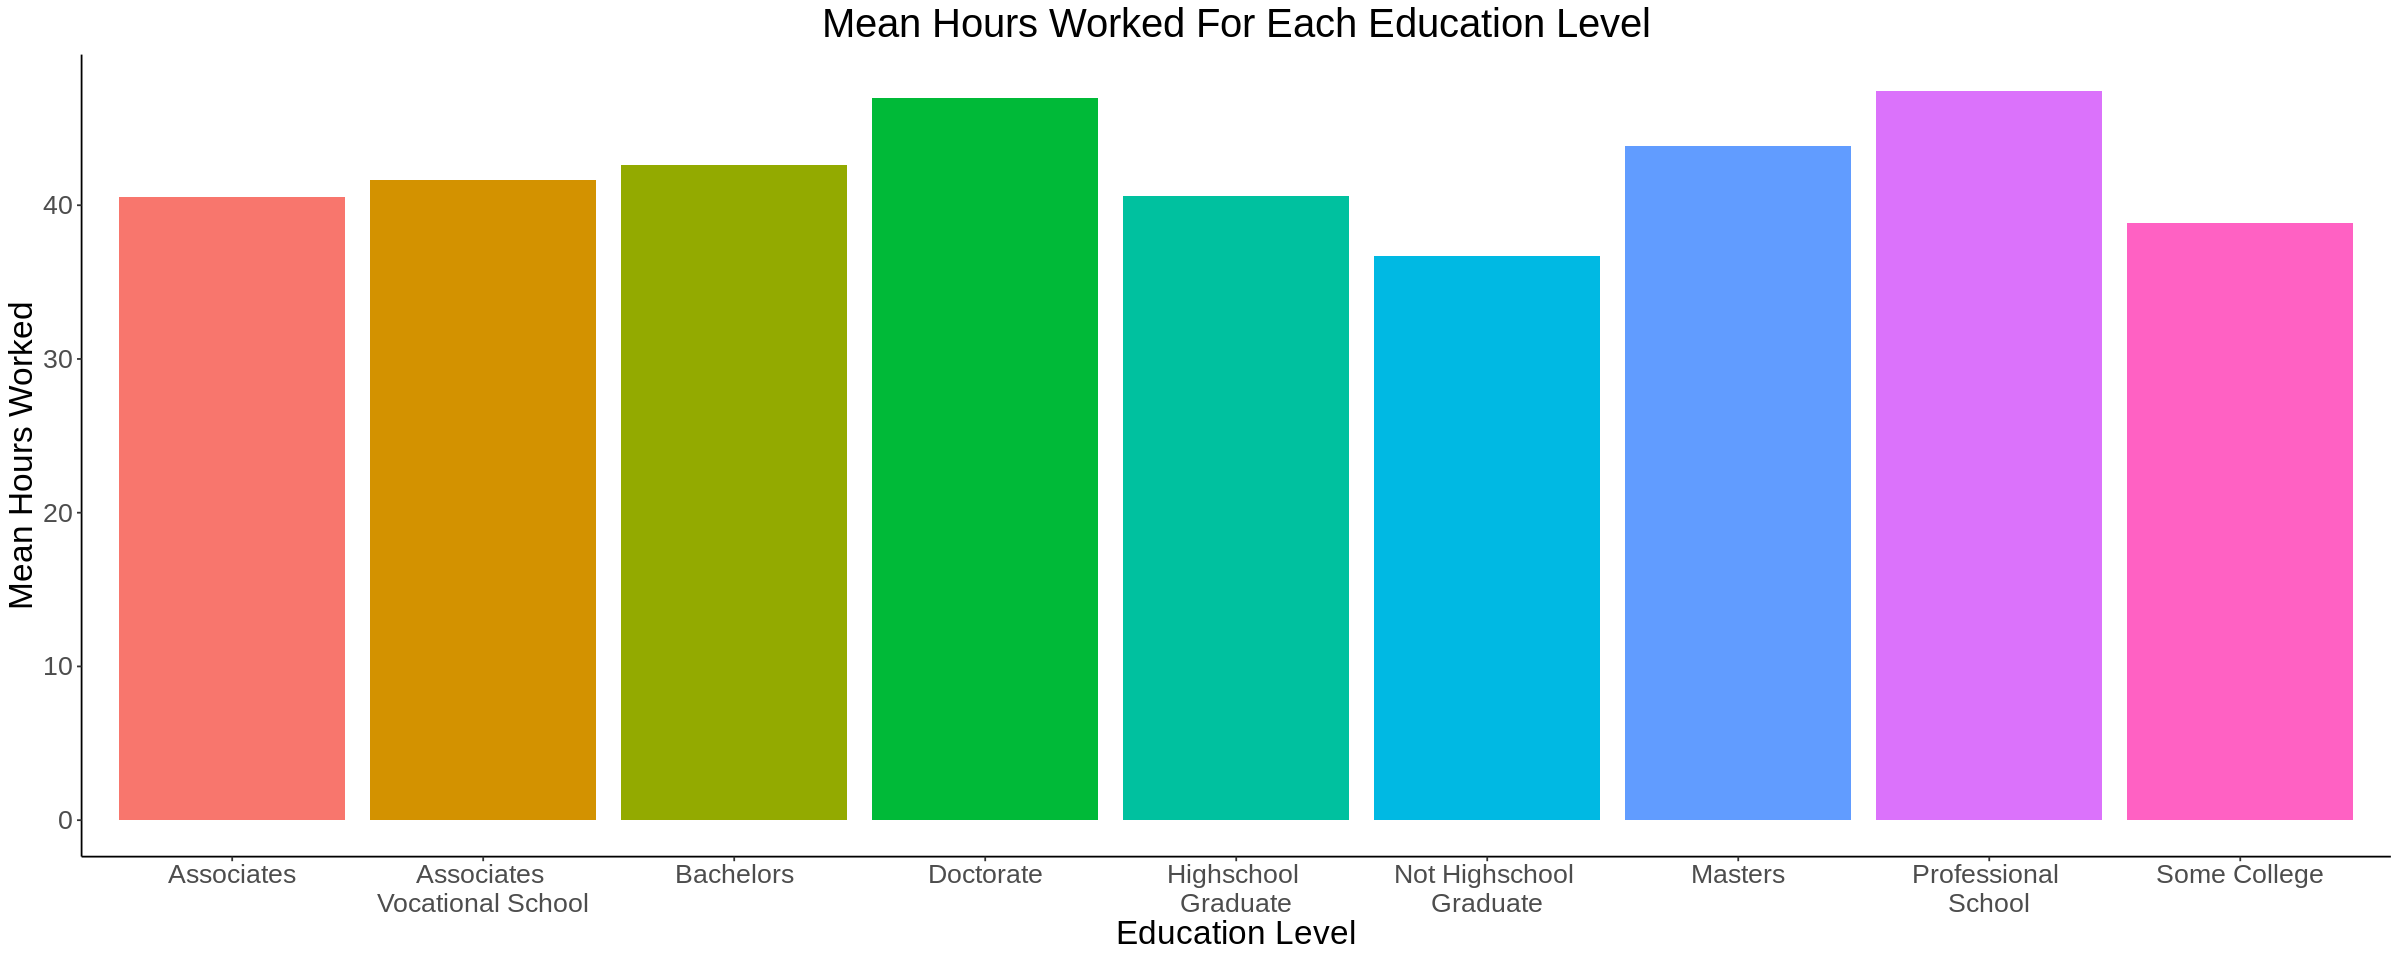

In [21]:
bar_means_hrs_education

<center><em>Figure 6: Bar-graph of Education</em></center>

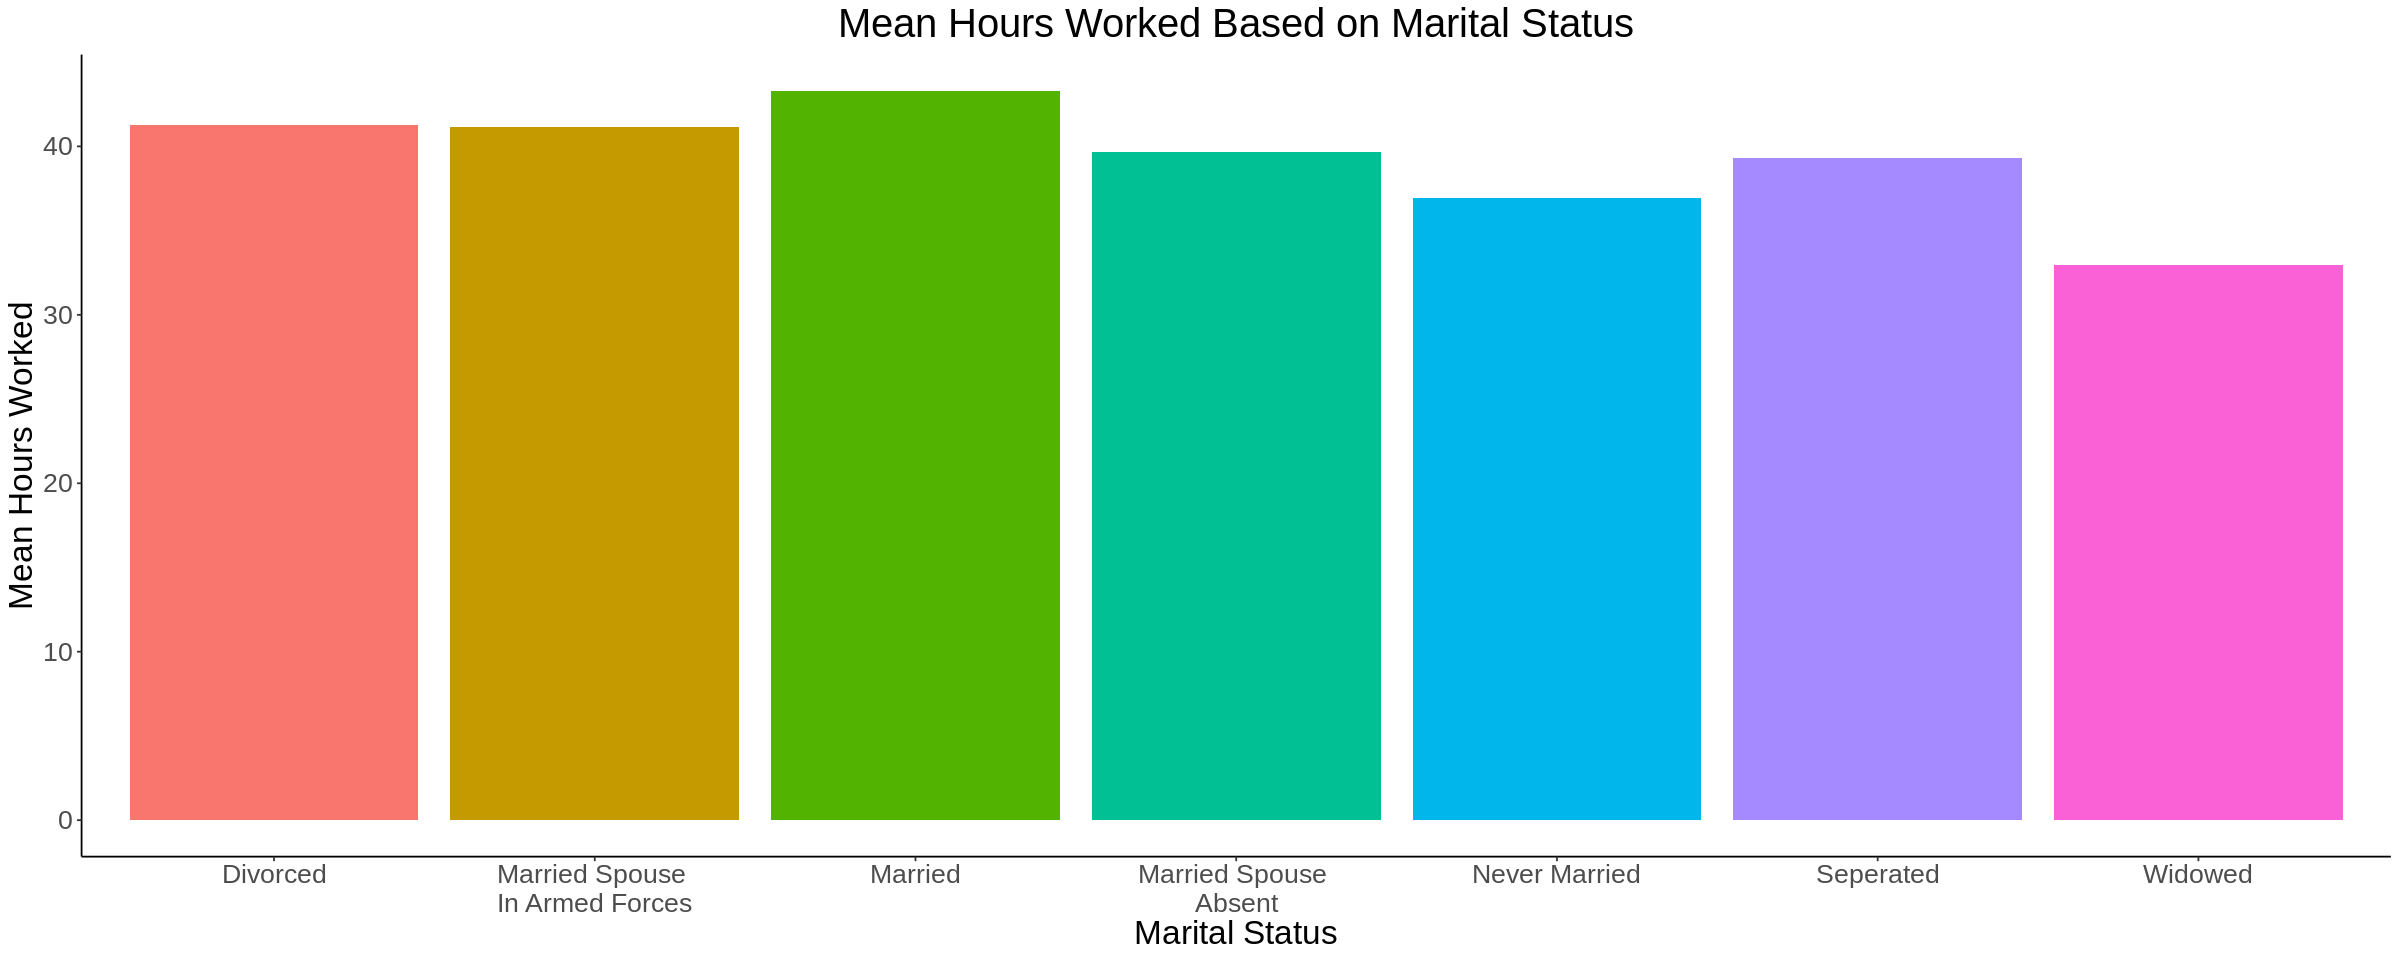

In [22]:
bar_means_marital_status

<center><em>Figure 7: Bar-graph of Marital Status</em></center>

# Hypothesis Tests & Confidence Intervals

### Testing Mean Working Hours Based on Education Level

We will be further studying how the mean work hours of people with an education less than high school compares to those with high school or more than high school. To conduct this test, we are going to do a one sample t-test to see if those that have a higher education work more hours compared to those that do not.

We had already created a "Less-than-HS" group in our preliminary results section, so below we are just creating another group called "More-than-HS" and putting all the rest of the observations in that group. This group called "More-than-HS" will also include those who are high-school graduates.

In [9]:
data_ed <- data

In [10]:
data_ed$education[data_ed$education == "Assoc-acdm" |
               data_ed$education == "Assoc-voc" |
               data_ed$education == "Bachelors" |
               data_ed$education == "Doctorate" |
               data_ed$education == "HS-grad" |
               data_ed$education == "Masters" |
               data_ed$education == "Prof-school" |
               data_ed$education == "Some-college"] = "More_than_HS"
compare_hour_low_hi <- data_ed |> 
    group_by(education) |> 
    summarize(mean_hours_per_week=mean(hours_per_week)) |>
    pull()

less_than_hs_mean <- compare_hour_low_hi[1]
more_than_hs_mean <- compare_hour_low_hi[2]

education_hour_table <- data_ed |> 
    select(education,hours_per_week)

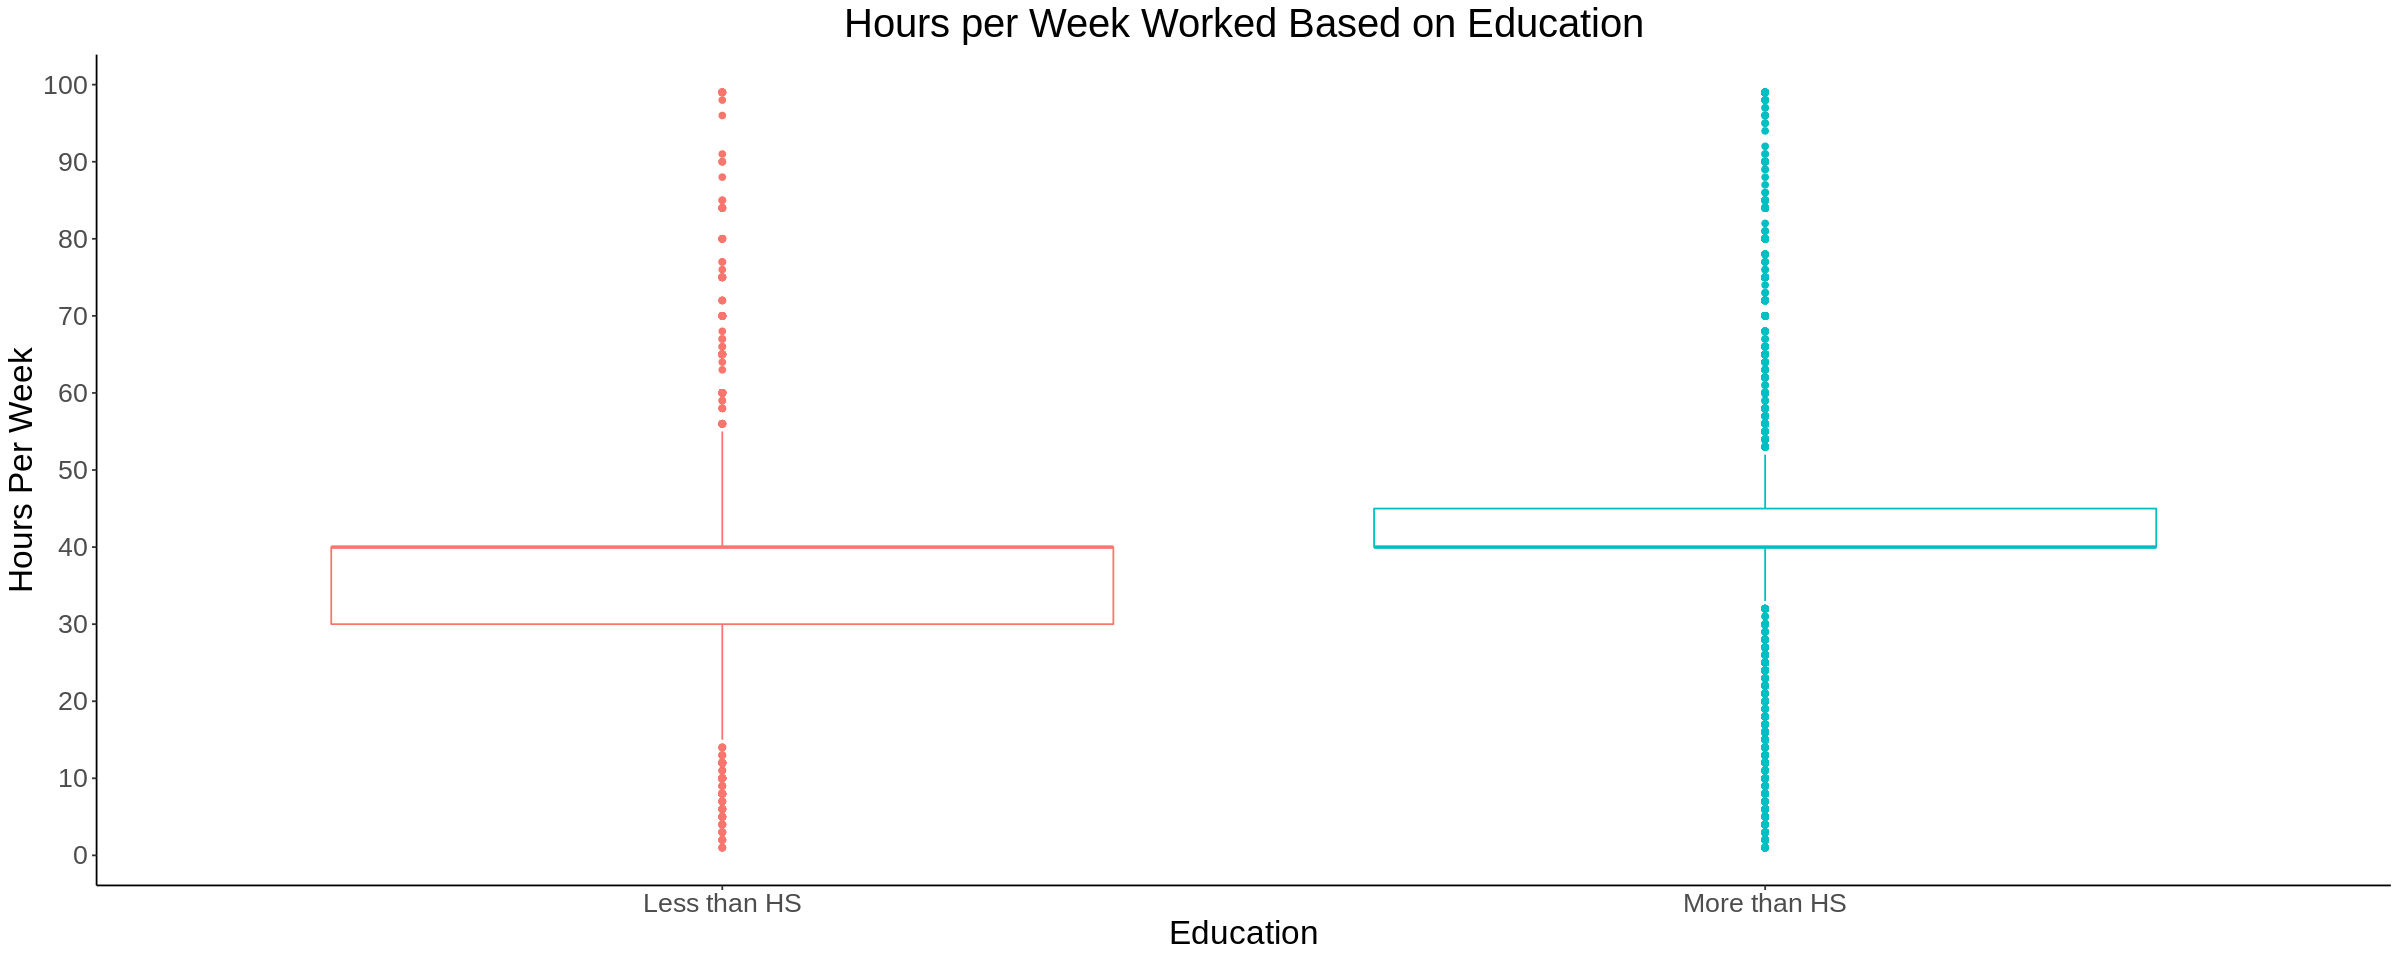

In [11]:
education_hour_box_plot <- education_hour_table %>%
    ggplot(aes(x = education, y = hours_per_week, color = education)) +
    geom_boxplot() +
    xlab("Education") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Education") +
    plot_config +
    boxplot_scale +
    scale_x_discrete(labels = c("Less than HS", "More than HS"))
education_hour_box_plot

<center><em>Figure 8: Boxplots Comparing less-than-HS and more-than-HS</em></center>

**Bootstraping Method**

Now we will be using bootstrapping to compute a 90% confidence interval.

In [12]:
data_education <- education_hour_table %>% group_by(education) %>% summarise(n = n())

**Computing n**

In [13]:
data_education

education,n
<chr>,<int>
Less_than_HS,4253
More_than_HS,28308


<center><em>Table 9: Computing n</em></center>

Below we are taking bootstrap samples, grouping them, computing the mean working hours for each group and selecting the `education` and `mean_working_hour` columns

In [14]:
set.seed(50)

bootstrap_dist_1 <- education_hour_table |>
    filter(education == "More_than_HS") |>
    rep_sample_n(reps= 1000, size = 28308, replace = TRUE) |> 
    group_by(replicate) |> 
    summarize(mean_working_hour = mean(hours_per_week)) |> 
    select(mean_working_hour)

bootstrap_dist_2 <- education_hour_table |>
    filter(education == "Less_than_HS") |>
    rep_sample_n(reps= 1000, size = 4253, replace = TRUE) |> 
    group_by(replicate) |> 
    summarize(mean_working_hour = mean(hours_per_week)) |> 
    select(mean_working_hour)

Below we have computed 90% confidence intevals

In [15]:
ci_1 <- bootstrap_dist_1 |> 
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

ci_2 <- bootstrap_dist_2 |> 
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

This code create a plot of our bootstrapped data, overlaying it is our confidence interval and the true mean of each group from our sample.

In [16]:
ci_plot_1 <- 
    bootstrap_dist_1 %>% 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    annotate("rect", xmin = ci_1$ci_lower, xmax = ci_1$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = more_than_hs_mean,
               size = 2,
               colour = "red") +
    labs(title = "Bootstrapping Approximation of People with Education Higher than High School",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config


ci_plot_2 <- 
    bootstrap_dist_2 %>% 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    annotate("rect", xmin = ci_2$ci_lower, xmax = ci_2$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = less_than_hs_mean,
               size = 2,
               colour = "red") +
    labs(title = "Bootstrapping Approximation of People with Education Lower than High School",
         x = "Mean Working Hours per Week (Hour)",
        y = "Number of Observations") +
    plot_config

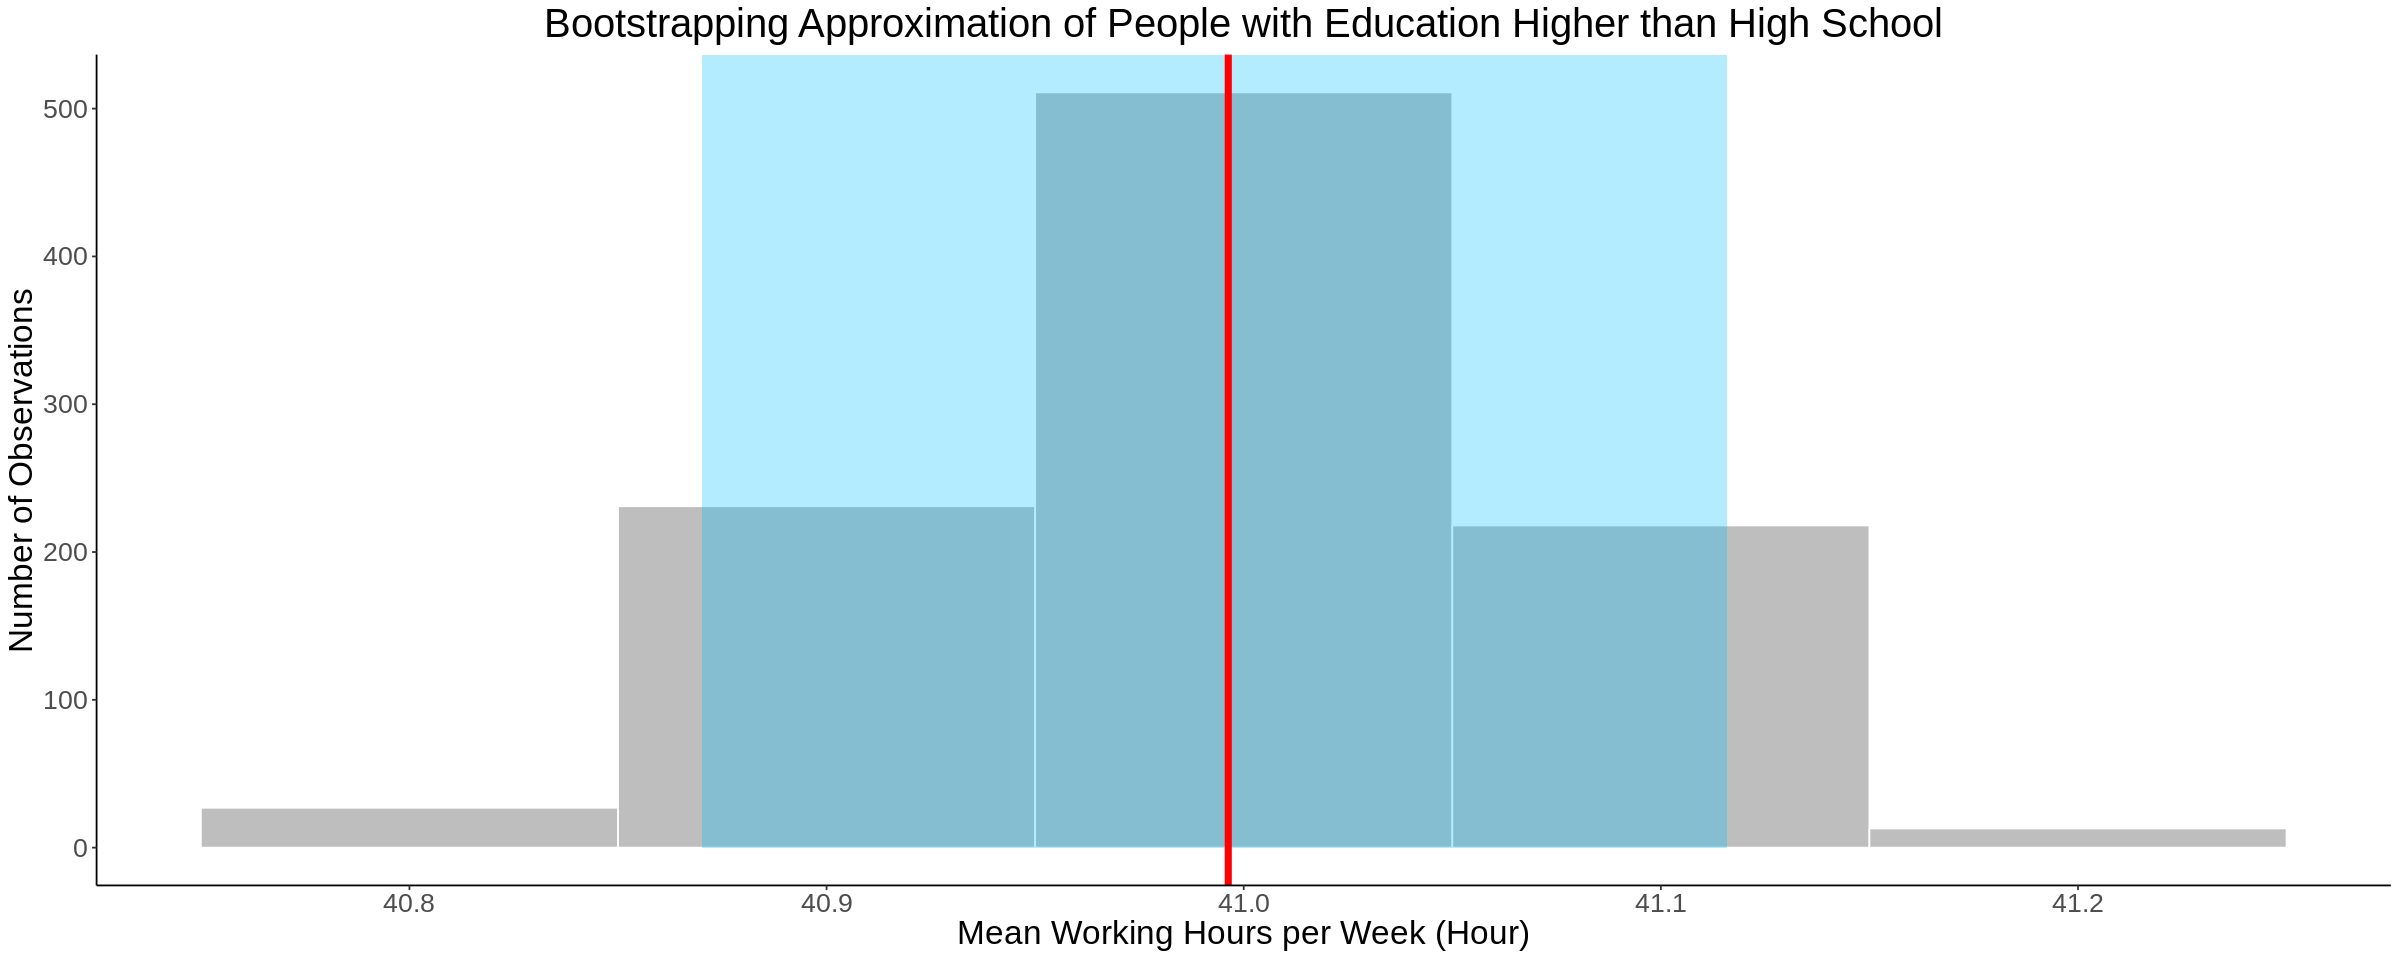

In [17]:
ci_plot_1

<center><em>Figure 9: Bootstrapping Approximation Graph</em></center>

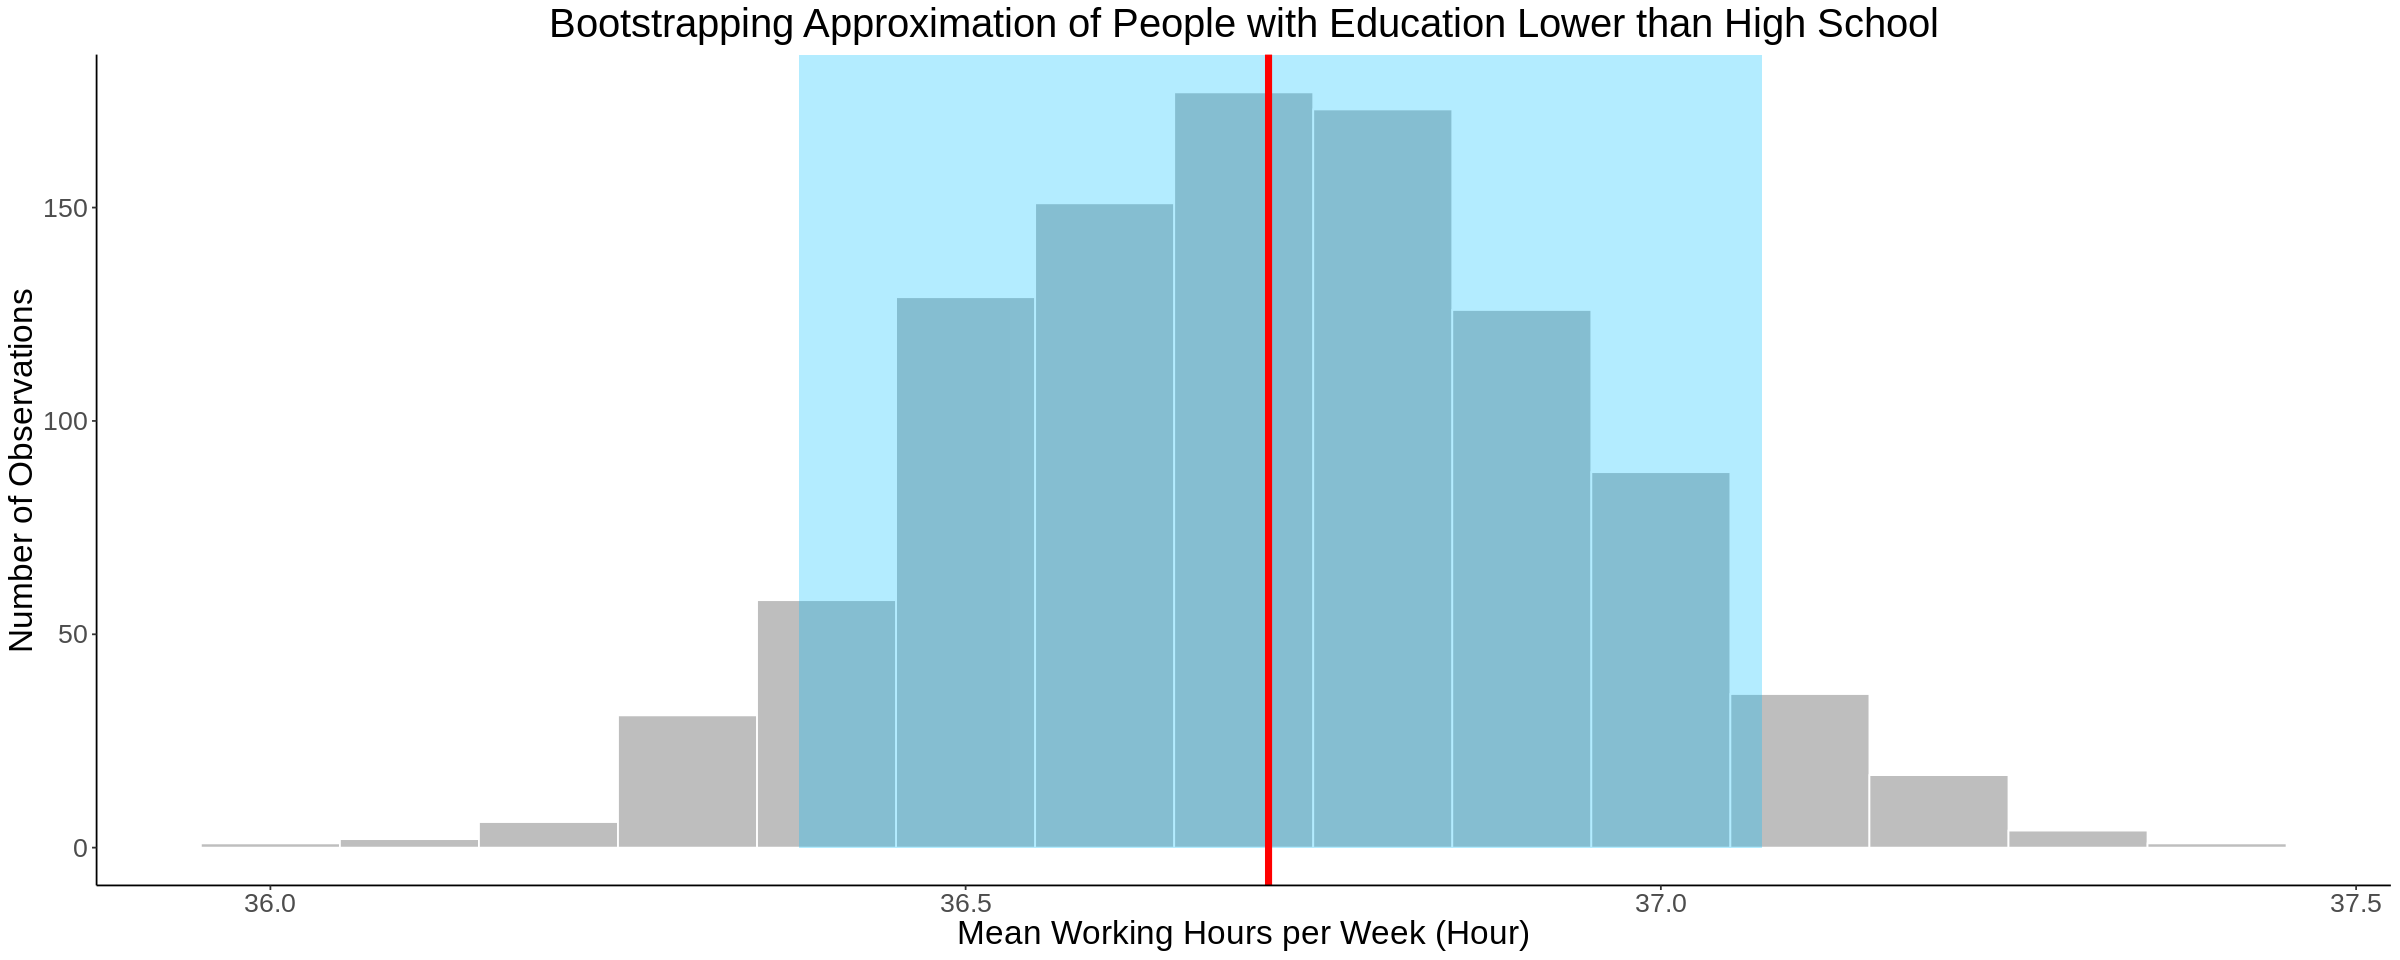

In [18]:
ci_plot_2

<center><em>Figure 10: Bootstrapping Approximation Graph</em></center>

**90% Confidence Interval for Bootstrapping Method of People with Education Higher than High School**

In [43]:
tibble("Mean" = more_than_hs_mean,
               "Lower" = ci_1$ci_lower,
               "Upper" = ci_1$ci_upper)

Mean,Lower,Upper
<dbl>,<dbl>,<dbl>
40.99629,40.87021,41.11596


<center><em>Table 10: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootstrapping Method of People with Education Lower than High School**

In [44]:
tibble("Mean" = less_than_hs_mean,
               "Lower" = ci_2$ci_lower,
               "Upper" = ci_2$ci_upper)

Mean,Lower,Upper
<dbl>,<dbl>,<dbl>
36.71785,36.38037,37.07271


<center><em>Table 11: 90% Confidence Interval</em></center>

**Explanation for Bootstrapping Confidence Intervals**

From figure 9, we are 90% confident that the true mean working hour per week for people with education higher than high school is between 40.87021 and 41.11596, which also indicates that our observed statistic falls in that range. Also, for figure 10 there is 90% confidence that the true mean working hour per week for people who with education that less than high school is between 36.38037 and 37.07271, and our observed statistic falls in that range. 

**Asymptotic Method**

Below we will be using the CLT to compute a 90% confidence interval.

In [19]:
more_hs = data_ed %>%
    filter(education == "More_than_HS")

less_hs = data %>%
    filter(education == "Less_than_HS")

In [20]:
more_hs_plot <- more_hs %>% 
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(aes(y =..density..), fill = "lightgray", binwidth = 5) +
    labs(title = "Normal Approximation using CLT of People with Education Higher than High School Overlapping Dataset",
         x = "Working Hours per Week (Hour)",
         y = "Density") +
    stat_function(fun = dnorm, args = list(mean = mean(more_hs$hours_per_week),
                                           sd = sd(more_hs$hours_per_week) / sqrt(nrow(more_hs))),
                 color = "black", size = 2) +
    plot_config +
    scale_x_continuous(breaks = seq(0, 100, 10)) +
    geom_vline(xintercept = mean(more_hs$hours_per_week),
               size = 2,
               colour = "red")

less_hs_plot <- less_hs %>% 
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(aes(y =..density..), fill = "lightgray", binwidth = 5) +
    labs(title = "Normal Approximation using CLT of People with Education Lower than High School Overlapping Dataset",
         x = "Working Hours per Week (Hour)",
         y = "Density") +
    stat_function(fun = dnorm, args = list(mean = mean(less_hs$hours_per_week),
                                           sd = sd(less_hs$hours_per_week) / sqrt(nrow(less_hs))),
                 color = "black", size = 2) +
    plot_config +
    scale_x_continuous(breaks = seq(0, 100, 10)) +
    geom_vline(xintercept = mean(less_hs$hours_per_week),
               size = 2,
               colour = "red")

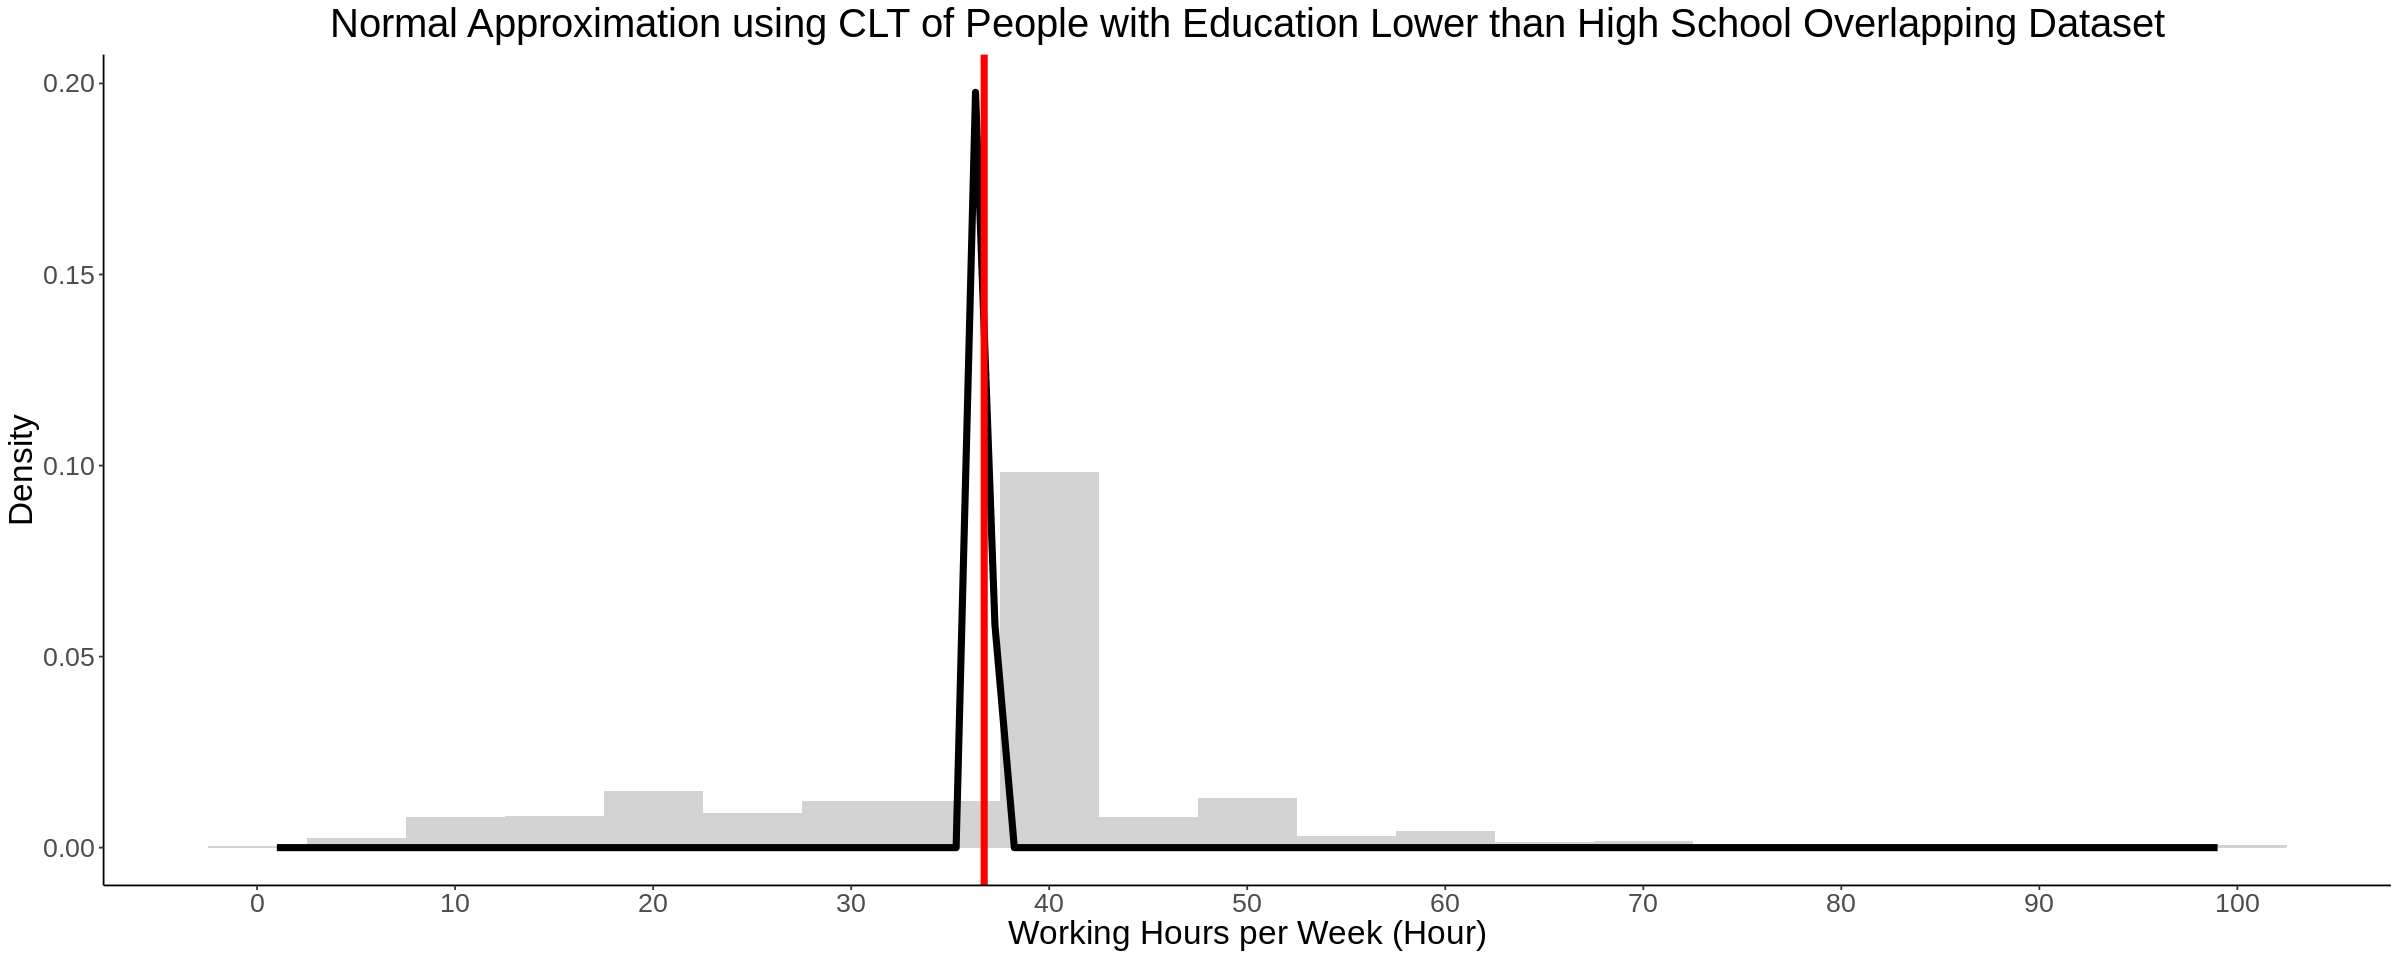

In [21]:
less_hs_plot

<center><em>Figure 11: CLT Graph</em></center>

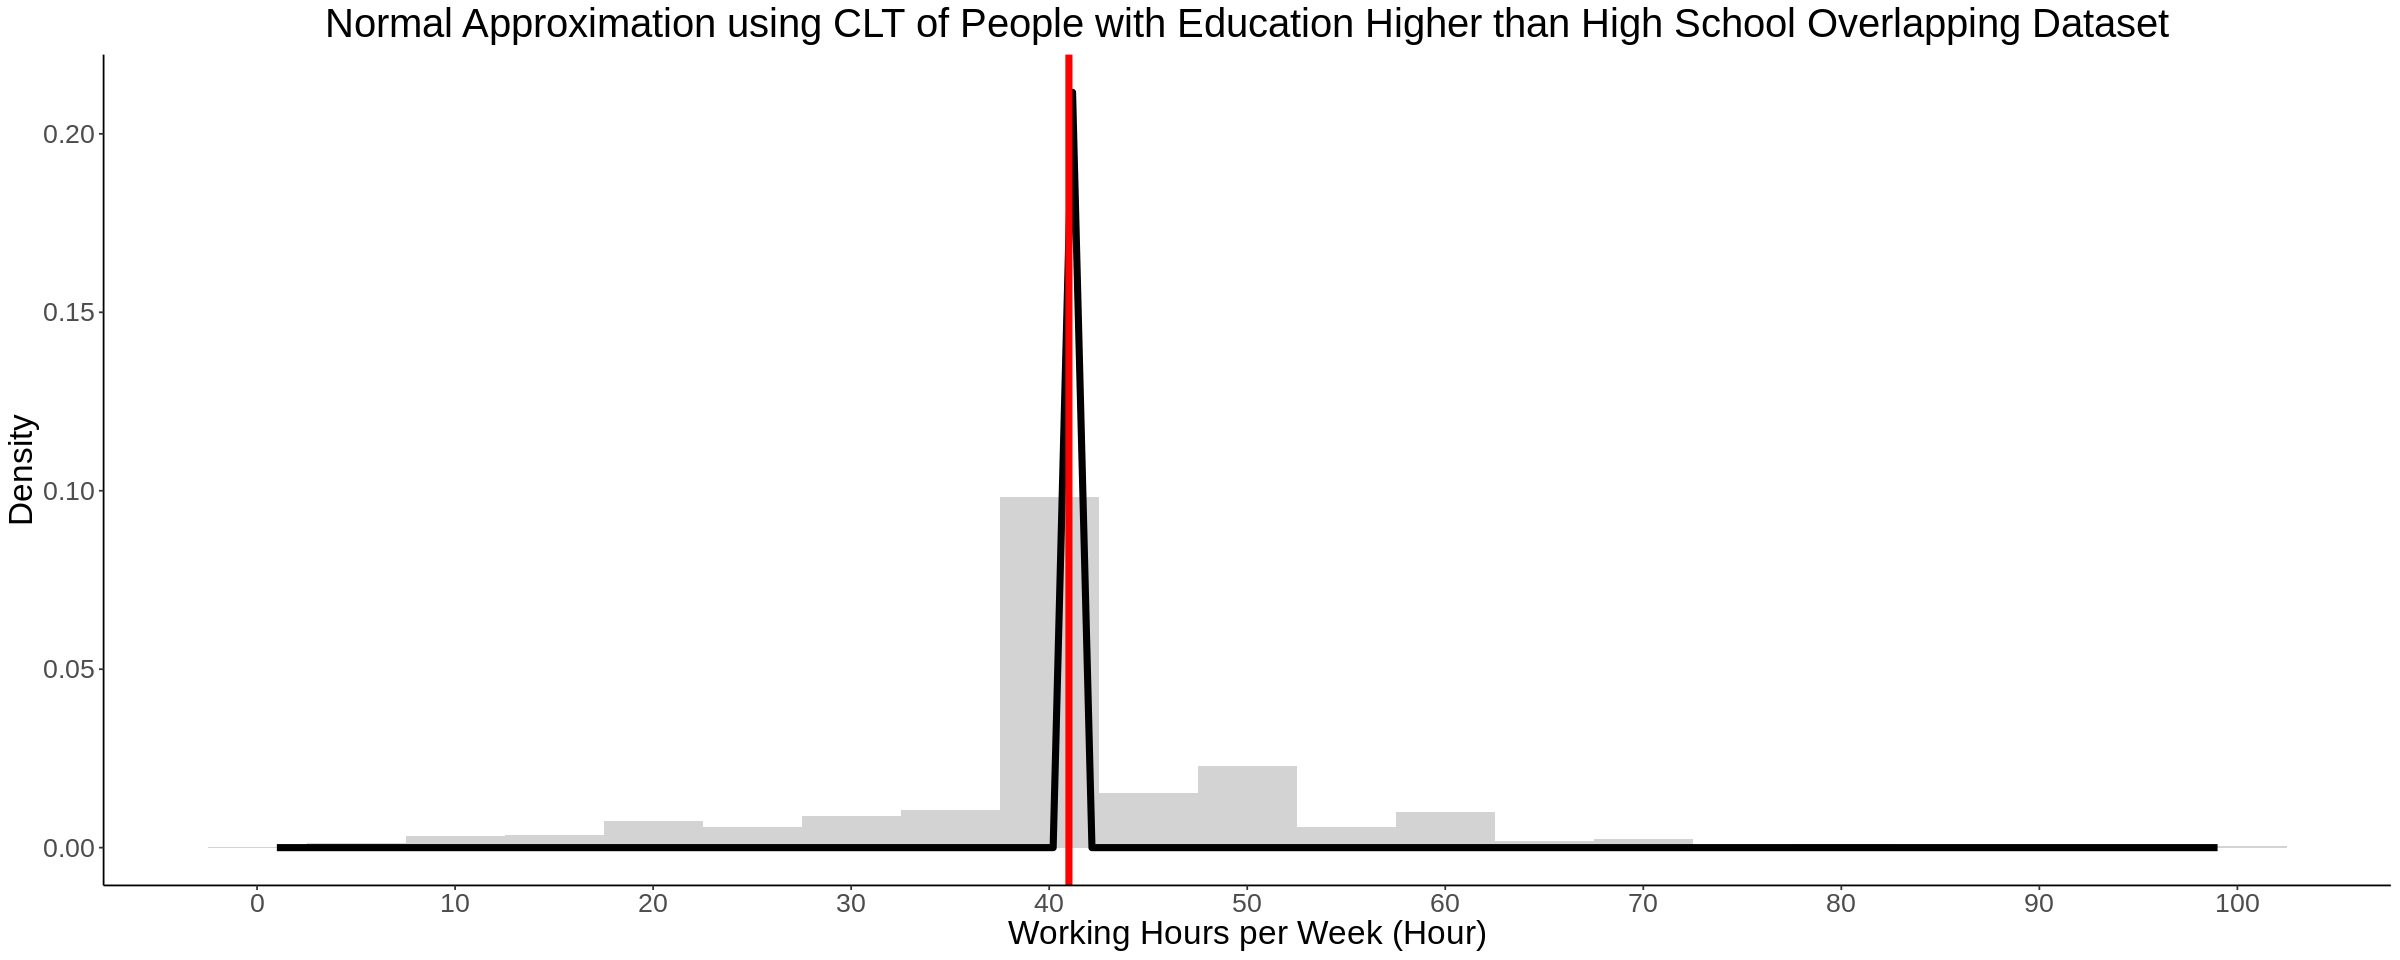

In [22]:
more_hs_plot

<center><em>Figure 12: CLT Graph</em></center>

**90% Confidence Interval for Asymptotic Method of People with Education Higher than High School**

In [23]:
tibble("Mean" = mean(more_hs$hours_per_week),
               "Lower" = qnorm(0.025, mean(more_hs$hours_per_week), sd(more_hs$hours_per_week) / sqrt(nrow(more_hs))),
               "Upper" = qnorm(0.95 + 0.025, mean(more_hs$hours_per_week), sd(more_hs$hours_per_week) / sqrt(nrow(more_hs))))


Mean,Lower,Upper
<dbl>,<dbl>,<dbl>
40.99629,40.85543,41.13715


<center><em>Table 12: Confidence Interval Table</em></center>

**90% Confidence Interval for Asymptotic Method of People with Education Lower than High School**

In [24]:
tibble("Mean" = mean(less_hs$hours_per_week),
               "Lower" = qnorm(0.025, mean(less_hs$hours_per_week), sd(less_hs$hours_per_week) / sqrt(nrow(less_hs))),
               "Upper" = qnorm(0.95 + 0.025, mean(less_hs$hours_per_week), sd(less_hs$hours_per_week) / sqrt(nrow(less_hs))))


Mean,Lower,Upper
<dbl>,<dbl>,<dbl>
36.71785,36.31673,37.11896


<center><em>Table 13: Confidence Interval Table</em></center>

**Explanation for Asymptotic Confidence Intervals**

From figure 11, we are 90% confident that the true mean working hour per week for people who with education higher than high school is between 40.85543 and 41.13715, and our observed statistic falls in that range.

For figure 12, there is a 90% confidence that the true mean working hour per week for people who with education less than high school is between 36.31673 and 37.11896, and that our observed statistic falls in that range. 

**Hypothesis Testing**

- $H_0$ : there is no difference in mean working hours per week of people with education higher than high school and people with education lower than high school 
- $H_A$ : there is a difference in mean working hours per week of people with education higher than high school and people with education lower than high school
- Significance Level : 0.05

In [56]:
x1 <- education_hour_table %>% filter(education == "More_than_HS") %>% pull(hours_per_week)
x2 <- education_hour_table %>% filter(education == "Less_than_HS") %>% pull(hours_per_week)

In [57]:
t_test <- tidy(t.test(x1, x2))

**Two-Sample T-test Results for Education**

In [58]:
t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
4.278445,40.99629,36.71785,19.72493,1.159073e-83,5353.207,3.853221,4.703668,Welch Two Sample t-test,two.sided


<center><em>Table 14: Two-Sample T-Test</em></center>

**P-Value**

Our P-value is $1.159073 * 10^{-83}$. Since the p-value is less than the chosen significance level, we reject the Null Hypothesis, which means there is enough evidence to show that the alternative Hypothesis is correct. Specifically, those with an education of high school or higher than high school work significantly more hours per week on average than those with an education of less than high school. 

### Mean Working Hours Based on Marital Status

We want to test whether marital status has an impact on the number of hours per week a person works. To study this variable of marital status, we decided to make three categories: married, unmarried (which includes divorced, widowed, never married) and married but not living with their spouse (which includes separated, spouse is in the military or spouse is absent). To conduct this test, we are going to use the Welch ANOVA method because we are comparing more than two independent groups and our groups have different variances.

First we are going to make a copy of our original dataset so we can edit it.

In [25]:
data_ms <- data

Below we are regrouping our `marital status` column into `married`, `not-married` and `married-not-together` because those are the groups we will be running our ANOVA test on.

In [26]:
data_ms$marital_status[data_ms$marital_status == "Separated" |
                          data_ms$marital_status == "Married-spouse-absent" |
                          data_ms$marital_status == "Married-AF-spouse"] = "Married-Not-Together"

data_ms$marital_status[data_ms$marital_status == "Married-civ-spouse"] = "Married"

data_ms$marital_status[data_ms$marital_status == "Never-married" |
                       data_ms$marital_status == "Widowed" |
                       data_ms$marital_status == "Divorced"] = "Not-Married"


**Bootstrapping Method**

Now we will use boostrapping to construct confidence intervals for each group in our categorical variable.

Below we are computing the number of observations for each group so we can determine the size of our sample for bootstrapping.

In [27]:
computing_n <- data_ms %>% group_by(marital_status) %>% summarise(n = n())
compare_hour_low_hi_marital <- data_ms |> 
    group_by(marital_status) |> 
    summarize(mean_hours_per_week=mean(hours_per_week)) |>
    pull()

**Computing n**

In [28]:
computing_n

marital_status,n
<chr>,<int>
Married,14976
Married-Not-Together,1466
Not-Married,16119


<center><em>Table 15: Computing n</em></center>

Below we are computing the true mean of each group from our dataset.

In [29]:
married_mean_s <- compare_hour_low_hi_marital[1]
married_nt_mean_s <- compare_hour_low_hi_marital[2]
not_married_s <- compare_hour_low_hi_marital[3]

Now we will be conducting bootstrapping.

In [31]:
married_bootstrap <- data_ms %>%
    filter(marital_status == "Married") %>%
    rep_sample_n(reps= 1000, size = 14976, replace = TRUE)

married_nt__bootstrap <- data_ms %>%
    filter(marital_status == "Married-Not-Together") %>%
    rep_sample_n(reps= 1000, size = 1466, replace = TRUE)

not_married_bootstrap <- data_ms %>%
    filter(marital_status == "Not-Married") %>%
    rep_sample_n(reps= 1000, size = 16119, replace = TRUE)

Computing the bootstrapped mean

In [ ]:
married_mean <- married_bootstrap %>%
    group_by(replicate) %>%
    summarize(mean_working_hour = mean(hours_per_week)) %>%
    mutate(marital_status = "Married") %>%
    select(marital_status, mean_working_hour)
married_nt__mean <- married_nt__bootstrap %>%
    group_by(replicate) %>%
    summarize(mean_working_hour = mean(hours_per_week)) %>%
    mutate(marital_status = "Married Not Together") %>%
    select(marital_status, mean_working_hour)
not_married_mean <- not_married_bootstrap %>%
    group_by(replicate) %>%
    summarize(mean_working_hour = mean(hours_per_week)) %>%
    mutate(marital_status = "Not Married") %>%
    select(marital_status, mean_working_hour)

Computing confidence interval for each group

In [116]:
ci_3 <- married_mean |>
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

ci_4 <- married_nt__mean |>
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

ci_5 <- not_married_mean |>
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

Creating plots of our bootstrapped data and overlaying confidence interval and the true mean

In [30]:
ci_plot_3 <- married_mean |> 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    annotate("rect", xmin = ci_3$ci_lower, xmax = ci_3$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = married_mean_s,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People who married and together",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config


ci_plot_4 <- married_nt__mean |> 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    annotate("rect", xmin = ci_4$ci_lower, xmax = ci_4$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = married_nt_mean_s,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People who married but not together now",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config

ci_plot_5 <- not_married_mean |> 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    annotate("rect", xmin = ci_5$ci_lower, xmax = ci_5$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = not_married_s,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People who not in married status",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config

ERROR: Error in ggplot(married_mean, aes(x = mean_working_hour)): object 'married_mean' not found


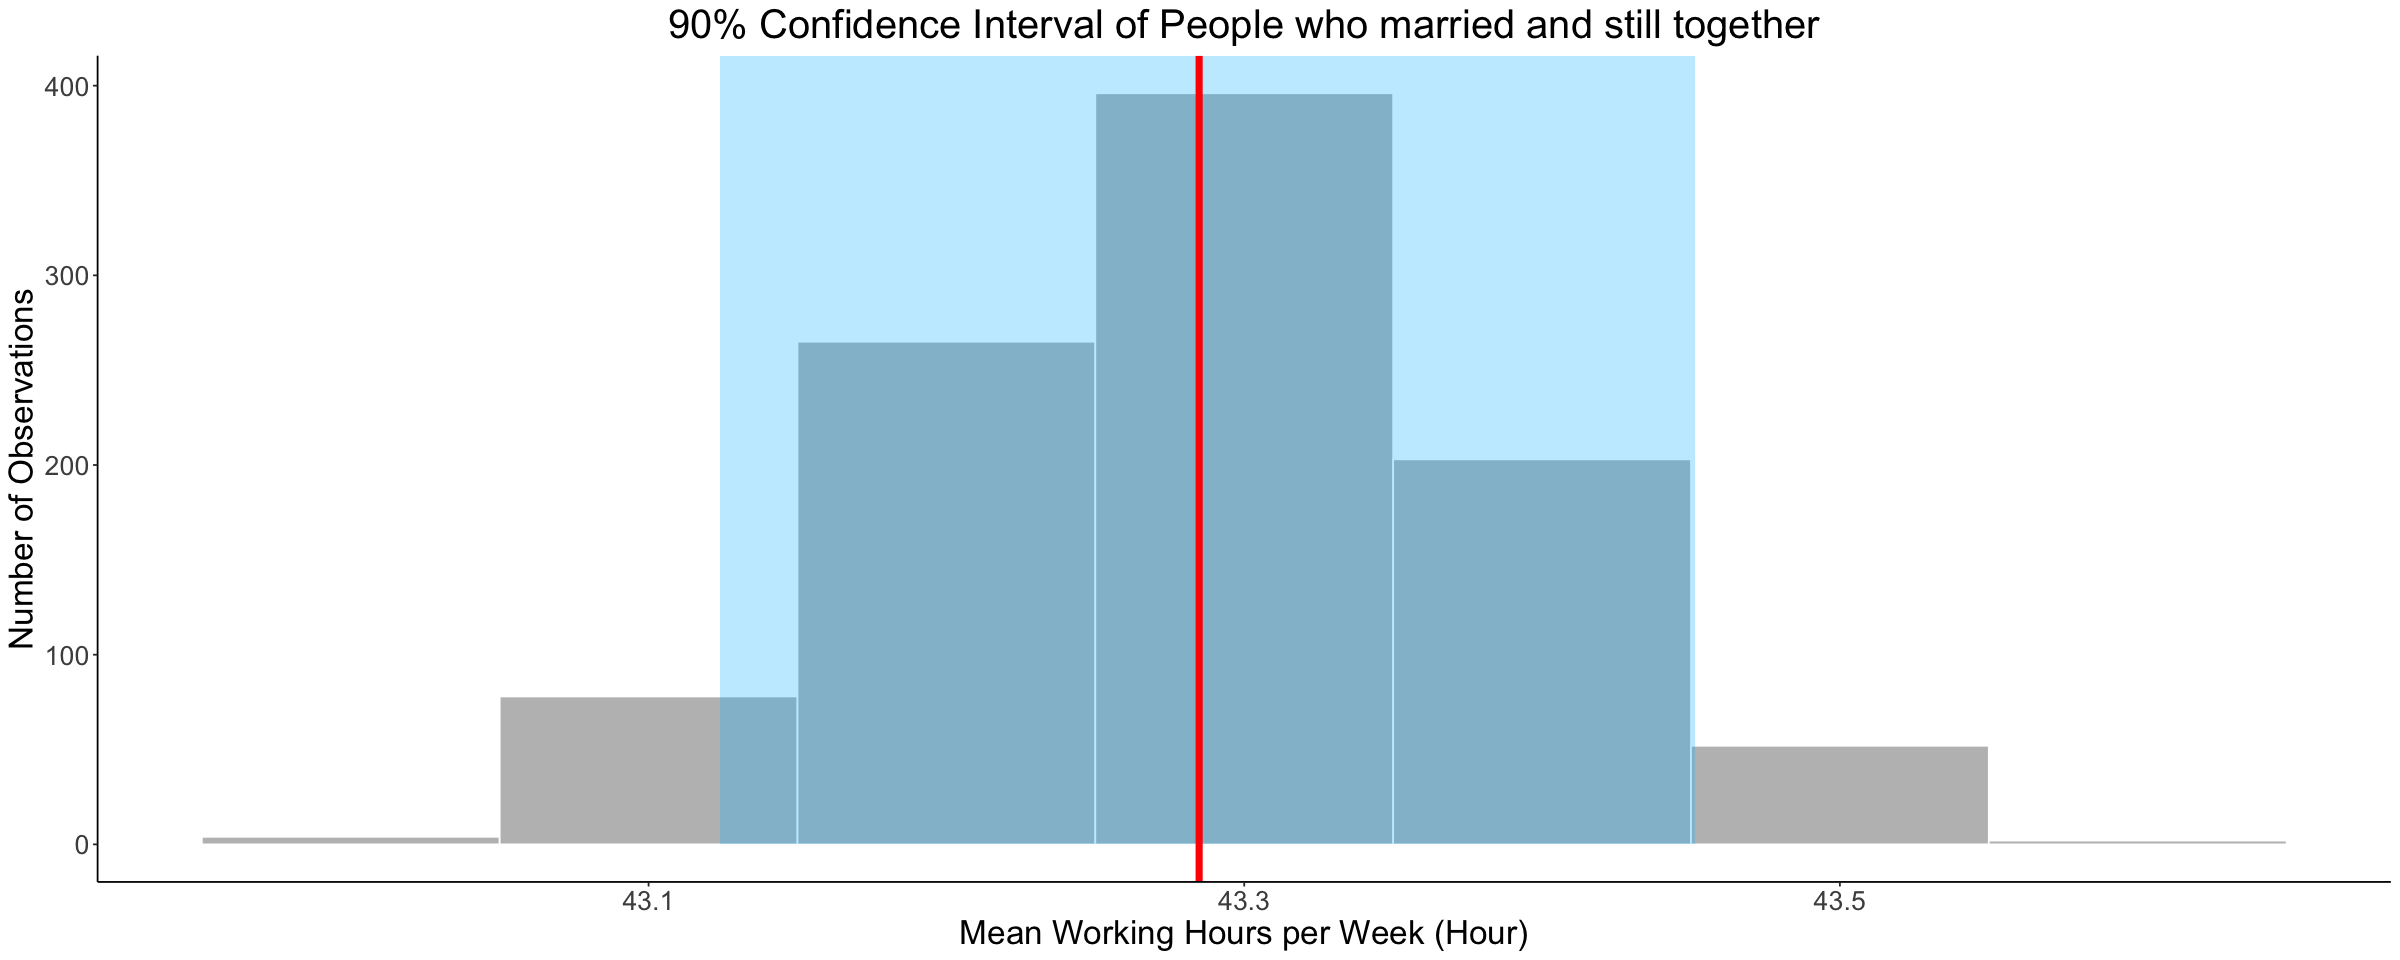

In [118]:
ci_plot_3

<center><em>Figure 13: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootsrapping Method of People Married and Still Together**

In [121]:
ci_3

ci_lower,ci_upper
<dbl>,<dbl>
43.12406,43.45149


<center><em>Table 16: 90% Confidence Interval Table</em></center>

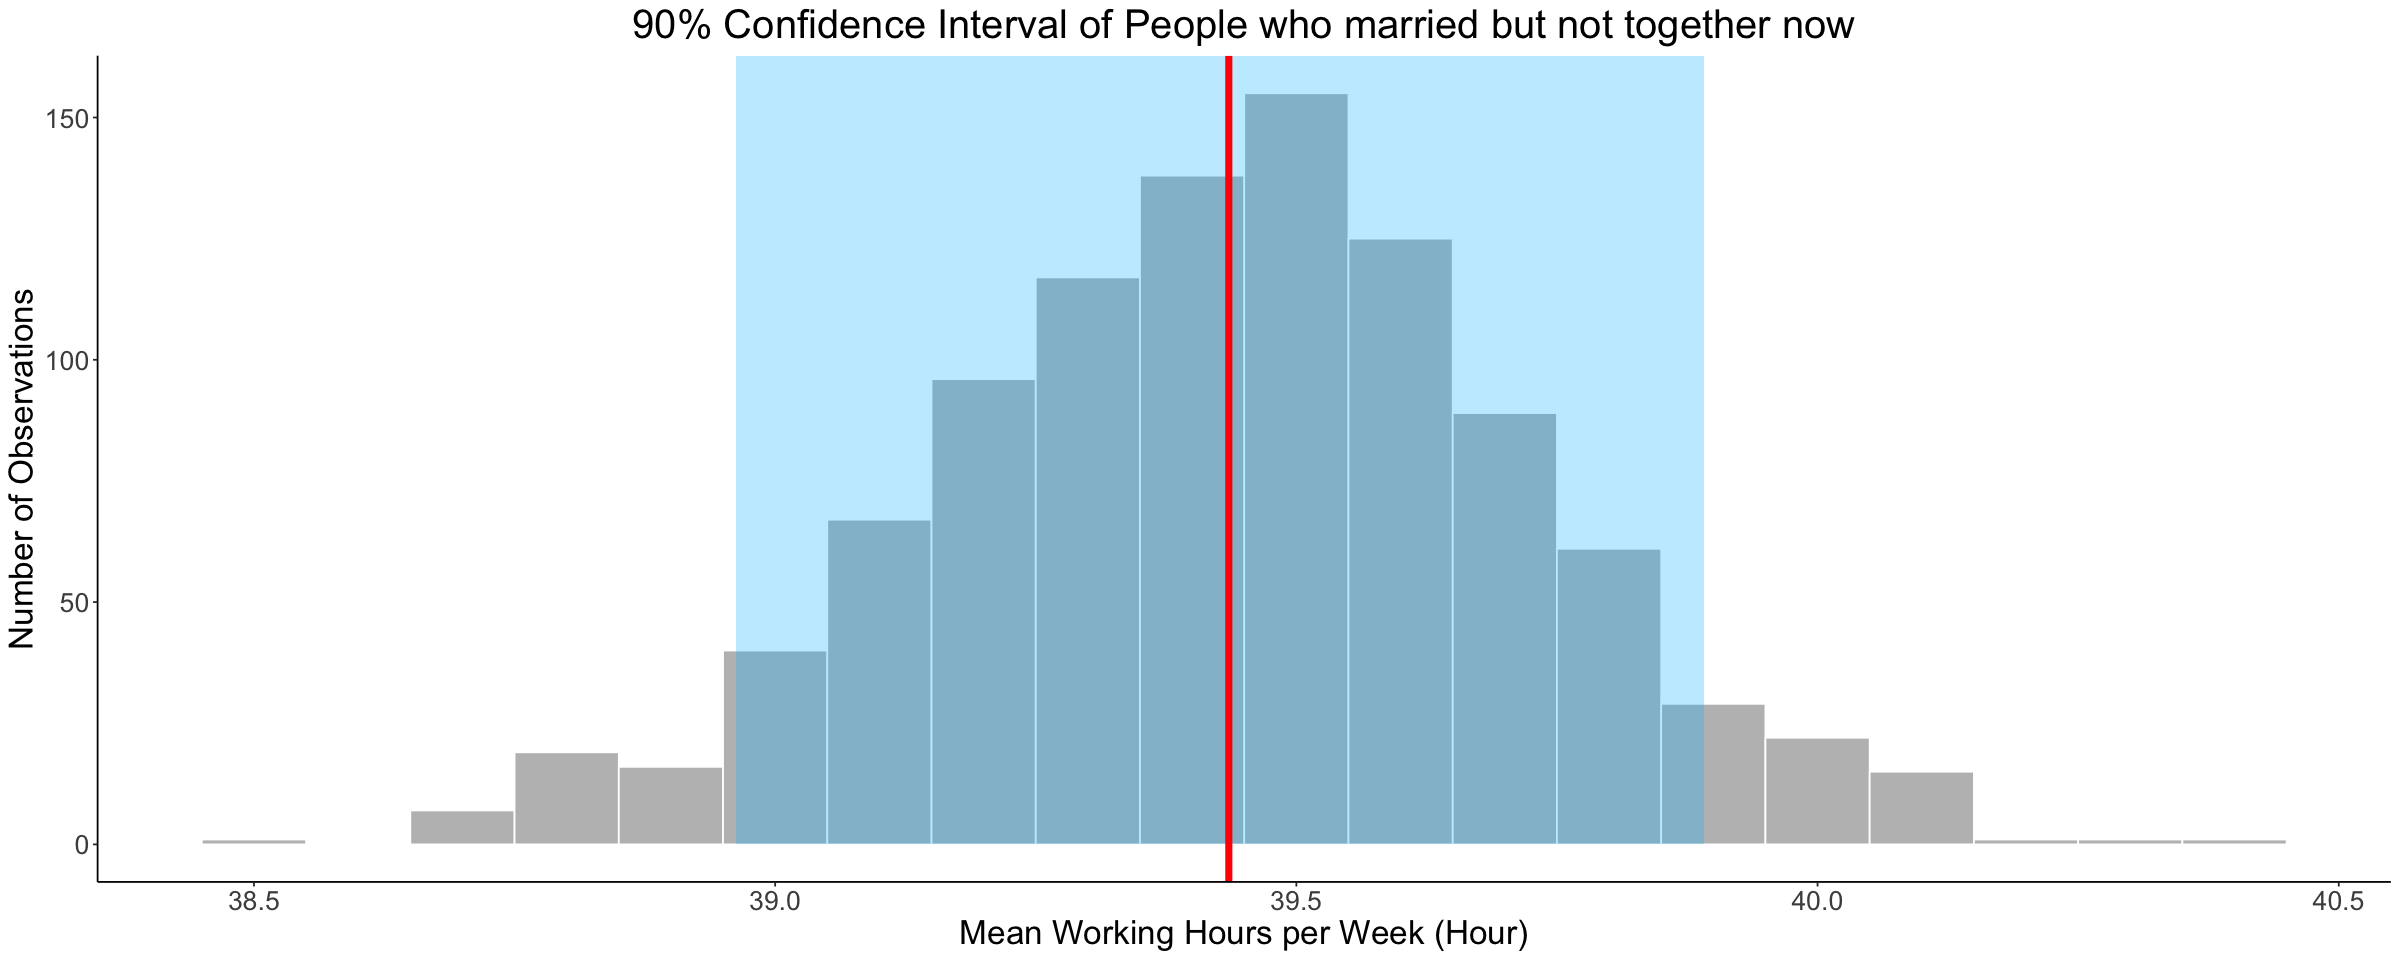

In [119]:
ci_plot_4

<center><em>Figure 14: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootsrapping Method of People Married and Not Together**

In [122]:
ci_4

ci_lower,ci_upper
<dbl>,<dbl>
38.96245,39.89069


<center><em>Table 17: 90% Confidence Interval Table</em></center>

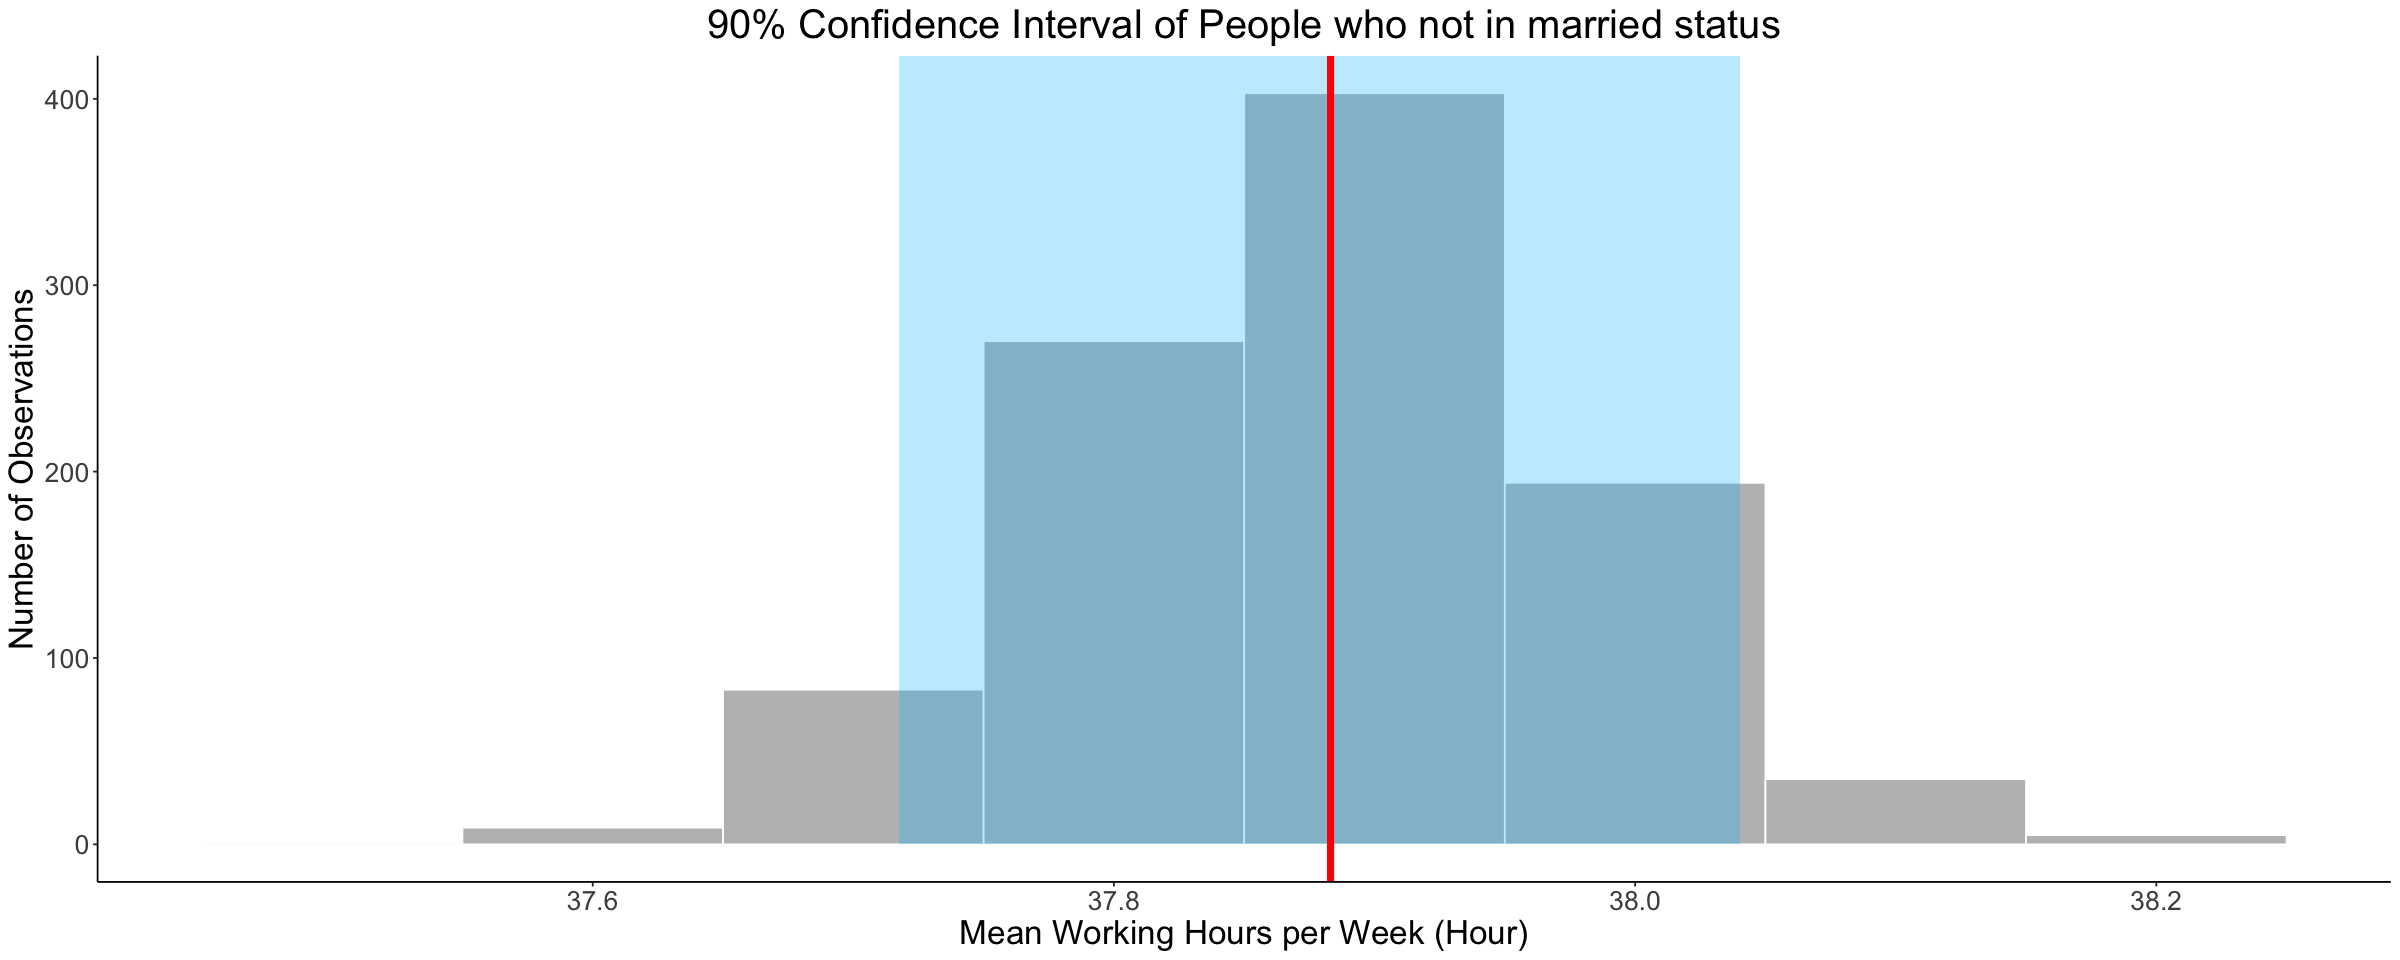

In [120]:
ci_plot_5

<center><em>Figure 15: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootsrapping Method of People Not Married**

In [123]:
ci_5

ci_lower,ci_upper
<dbl>,<dbl>
37.71766,38.04013


<center><em>Table 18: 90% Confidence Interval Table</em></center>

**Asymptotic Method**

Now we will be using the asmptotic method to construct confidence intervals for each group. We will be using CLT, but because the CLT has some conditions, we need to check them. Given that we did not collect this sample, we will be assuming that the CLT is applicable.

In order to use asymptotic, we first extracted the data for each marital status group and stored them in variables.

In [88]:
married_not_t = data_ms %>%
    filter(marital_status == "Married-Not-Together")
married_t = data_ms %>% 
    filter(marital_status == "Married")
not_married = data_ms %>% 
    filter(marital_status == "Not-Married")

Using the fact that as $n -> \infty, X \approx Norm(\mu, \frac{\sigma}{\sqrt{n}})$, we plotted that normal distribution and underlayed the original dataset for comparision.

In [2]:
#married but not together right now plot
married_not_t_plot <- married_not_t %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(aes(y = ..density..), fill = "lightgray", binwidth=5) +
    labs(title = "Normal Approximation using CLT fo people who married but not together now",
        x = "Working Hours per Week (Hour)",
        y = "Density") +
    stat_function(fun = dnorm, args = list(mean = mean(married_not_t$hours_per_week),
                                          sd = sd(married_not_t$hours_per_week) / sqrt(nrow(married_not_t))),
                 color = "black", size = 2) +
        plot_config +
        scale_x_continuous(breaks = seq(0,100,10)) +
        geom_vline(xintercept = mean(married_not_t$hours_per_week),
                  size = 2,
                  colour = "red")

#married and together plot        
married_t_plot <- married_t %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(aes(y = ..density..), fill = "lightgray", binwidth=5) +
    labs(title = "Normal Approximation using CLT fo people who married and still together",
        x = "Working Hours per Week (Hour)",
        y = "Density") +
    stat_function(fun = dnorm, args = list(mean = mean(married_t$hours_per_week),
                                          sd = sd(married_t$hours_per_week) / sqrt(nrow(married_t))),
                 color = "black", size = 2) +
        plot_config +
        scale_x_continuous(breaks = seq(0,100,10)) +
        geom_vline(xintercept = mean(married_t$hours_per_week),
                  size = 2,
                  colour = "red")    

#never married before plot
not_married_plot <- not_married %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(aes(y = ..density..), fill = "lightgray", binwidth=5) +
    labs(title = "Normal Approximation using CLT fo people who are not married",
        x = "Working Hours per Week (Hour)",
        y = "Density") +
    stat_function(fun = dnorm, args = list(mean = mean(not_married$hours_per_week),
                                          sd = sd(not_married$hours_per_week) / sqrt(nrow(not_married))),
                 color = "black", size = 2) +
        plot_config +
        scale_x_continuous(breaks = seq(0,100,10)) +
        geom_vline(xintercept = mean(not_married$hours_per_week),
                  size = 2,
                  colour = "red")
        

ERROR: Error in married_not_t %>% ggplot(aes(x = hours_per_week)): could not find function "%>%"


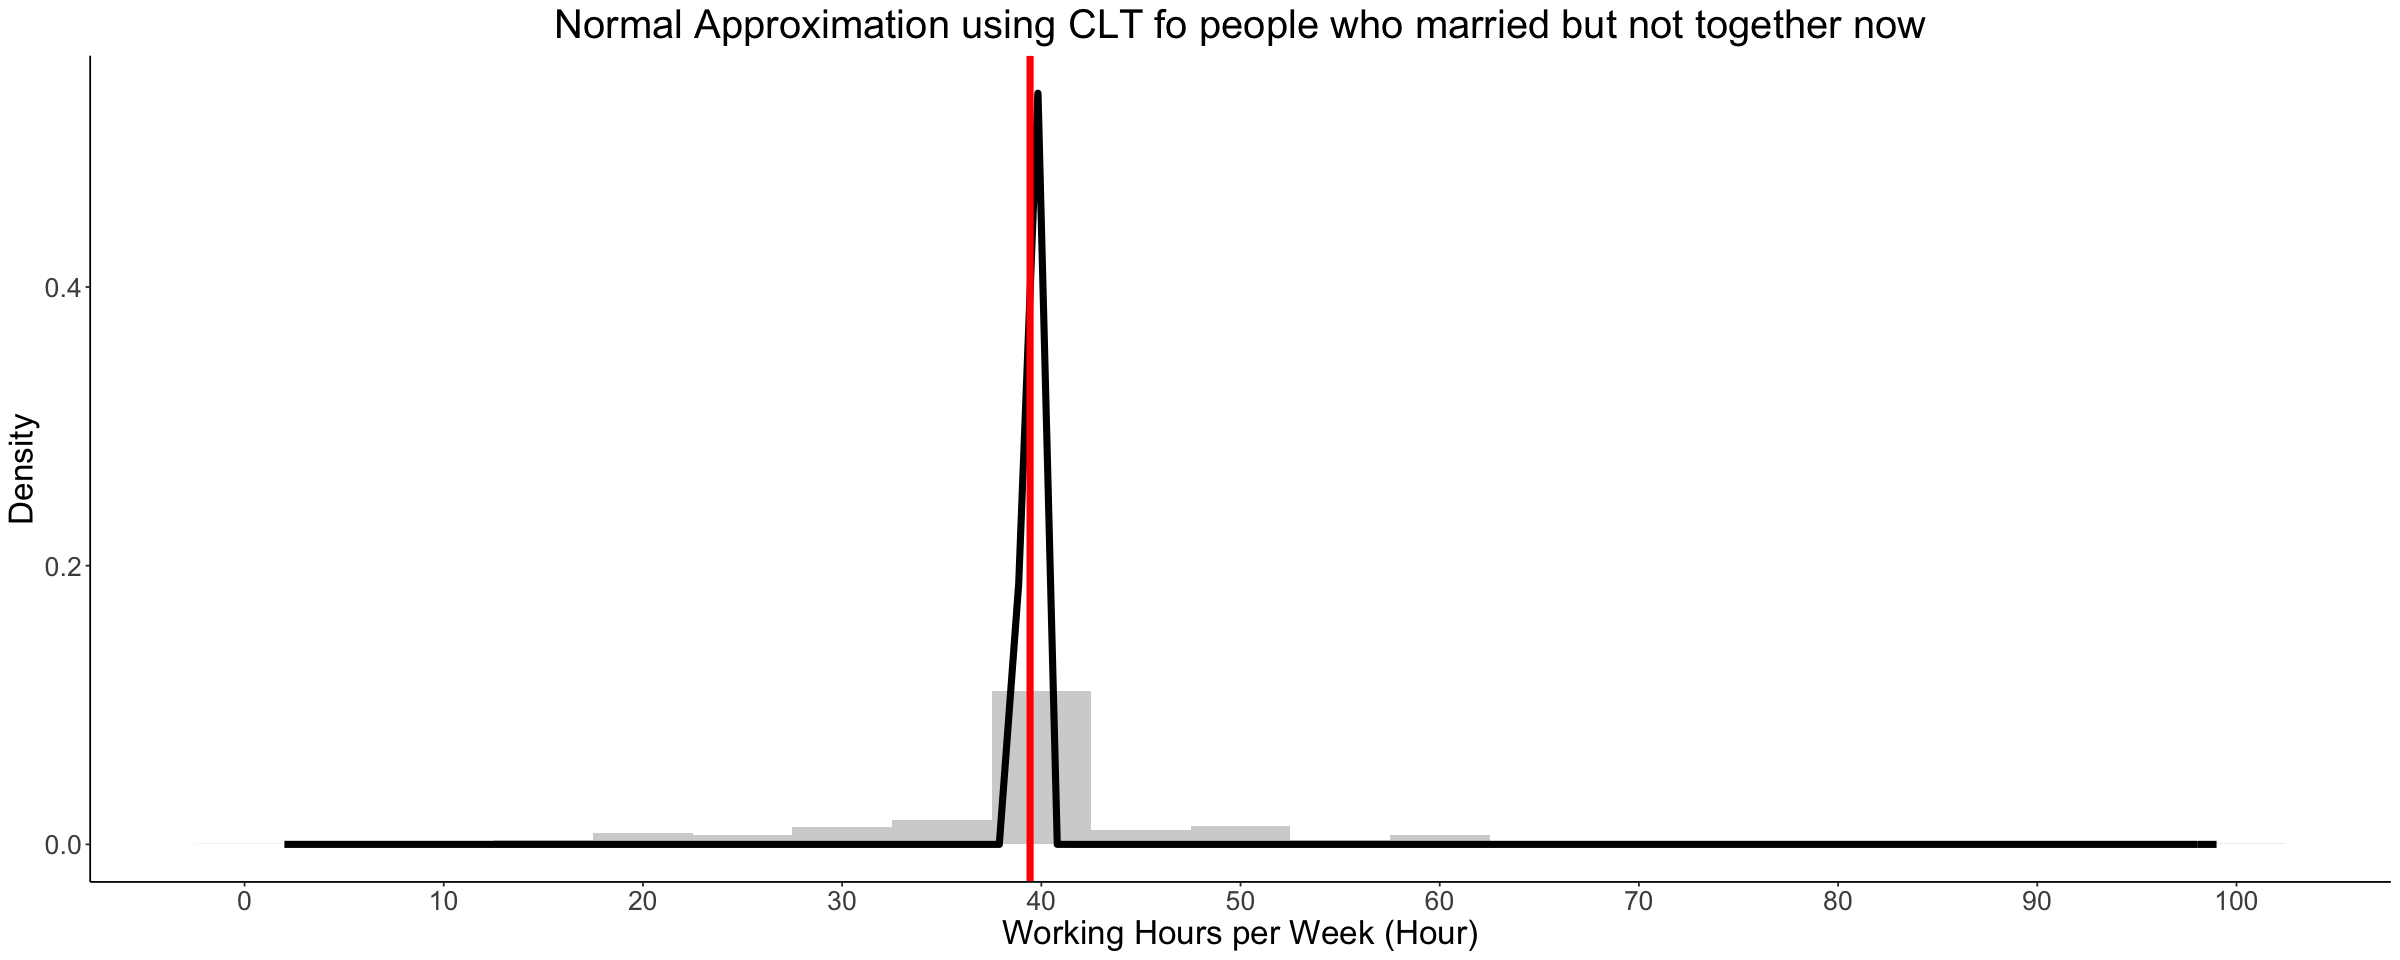

In [90]:
married_not_t_plot

<center><em>Figure 16: CLT Graph</em></center>

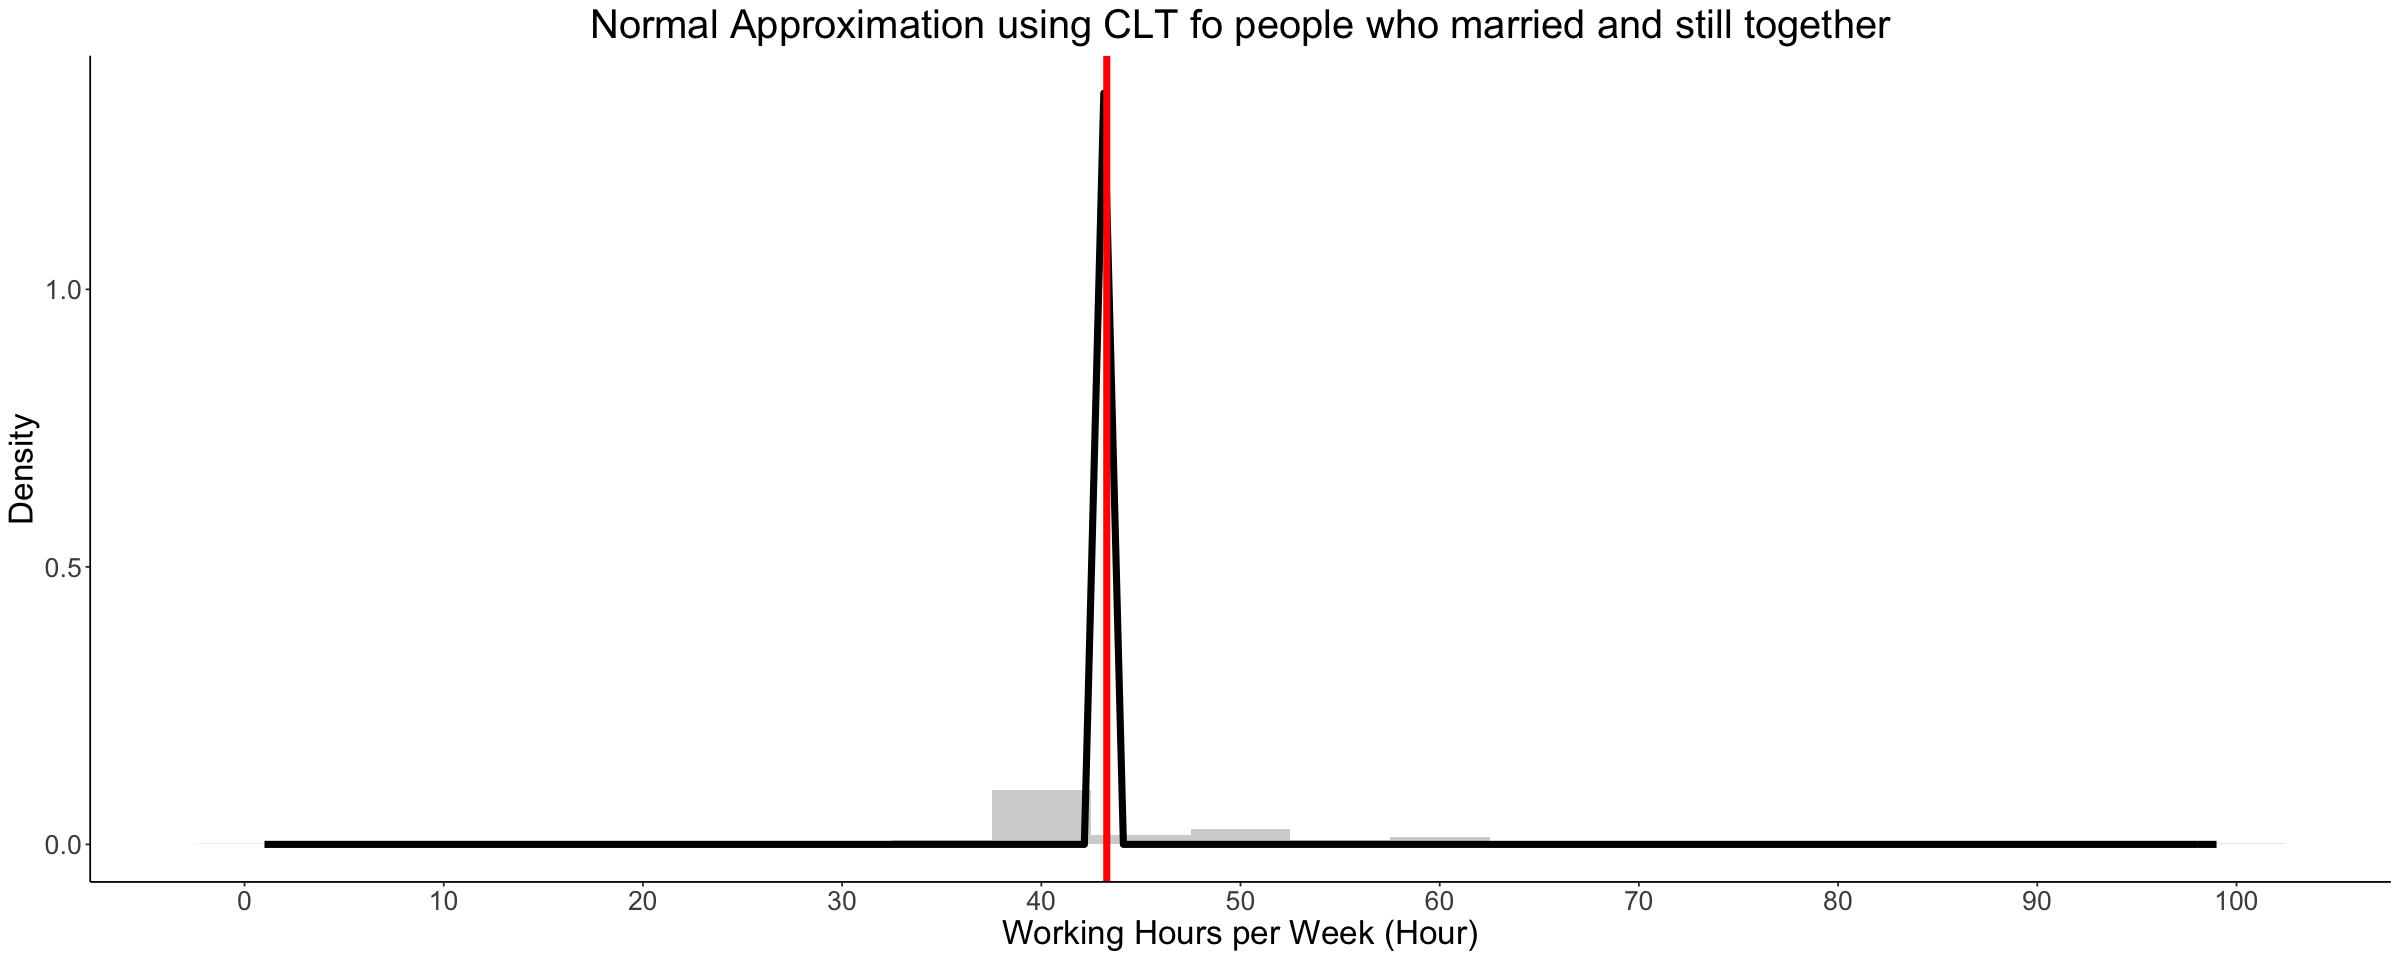

In [91]:
married_t_plot

<center><em>Figure 17: CLT Graph</em></center>

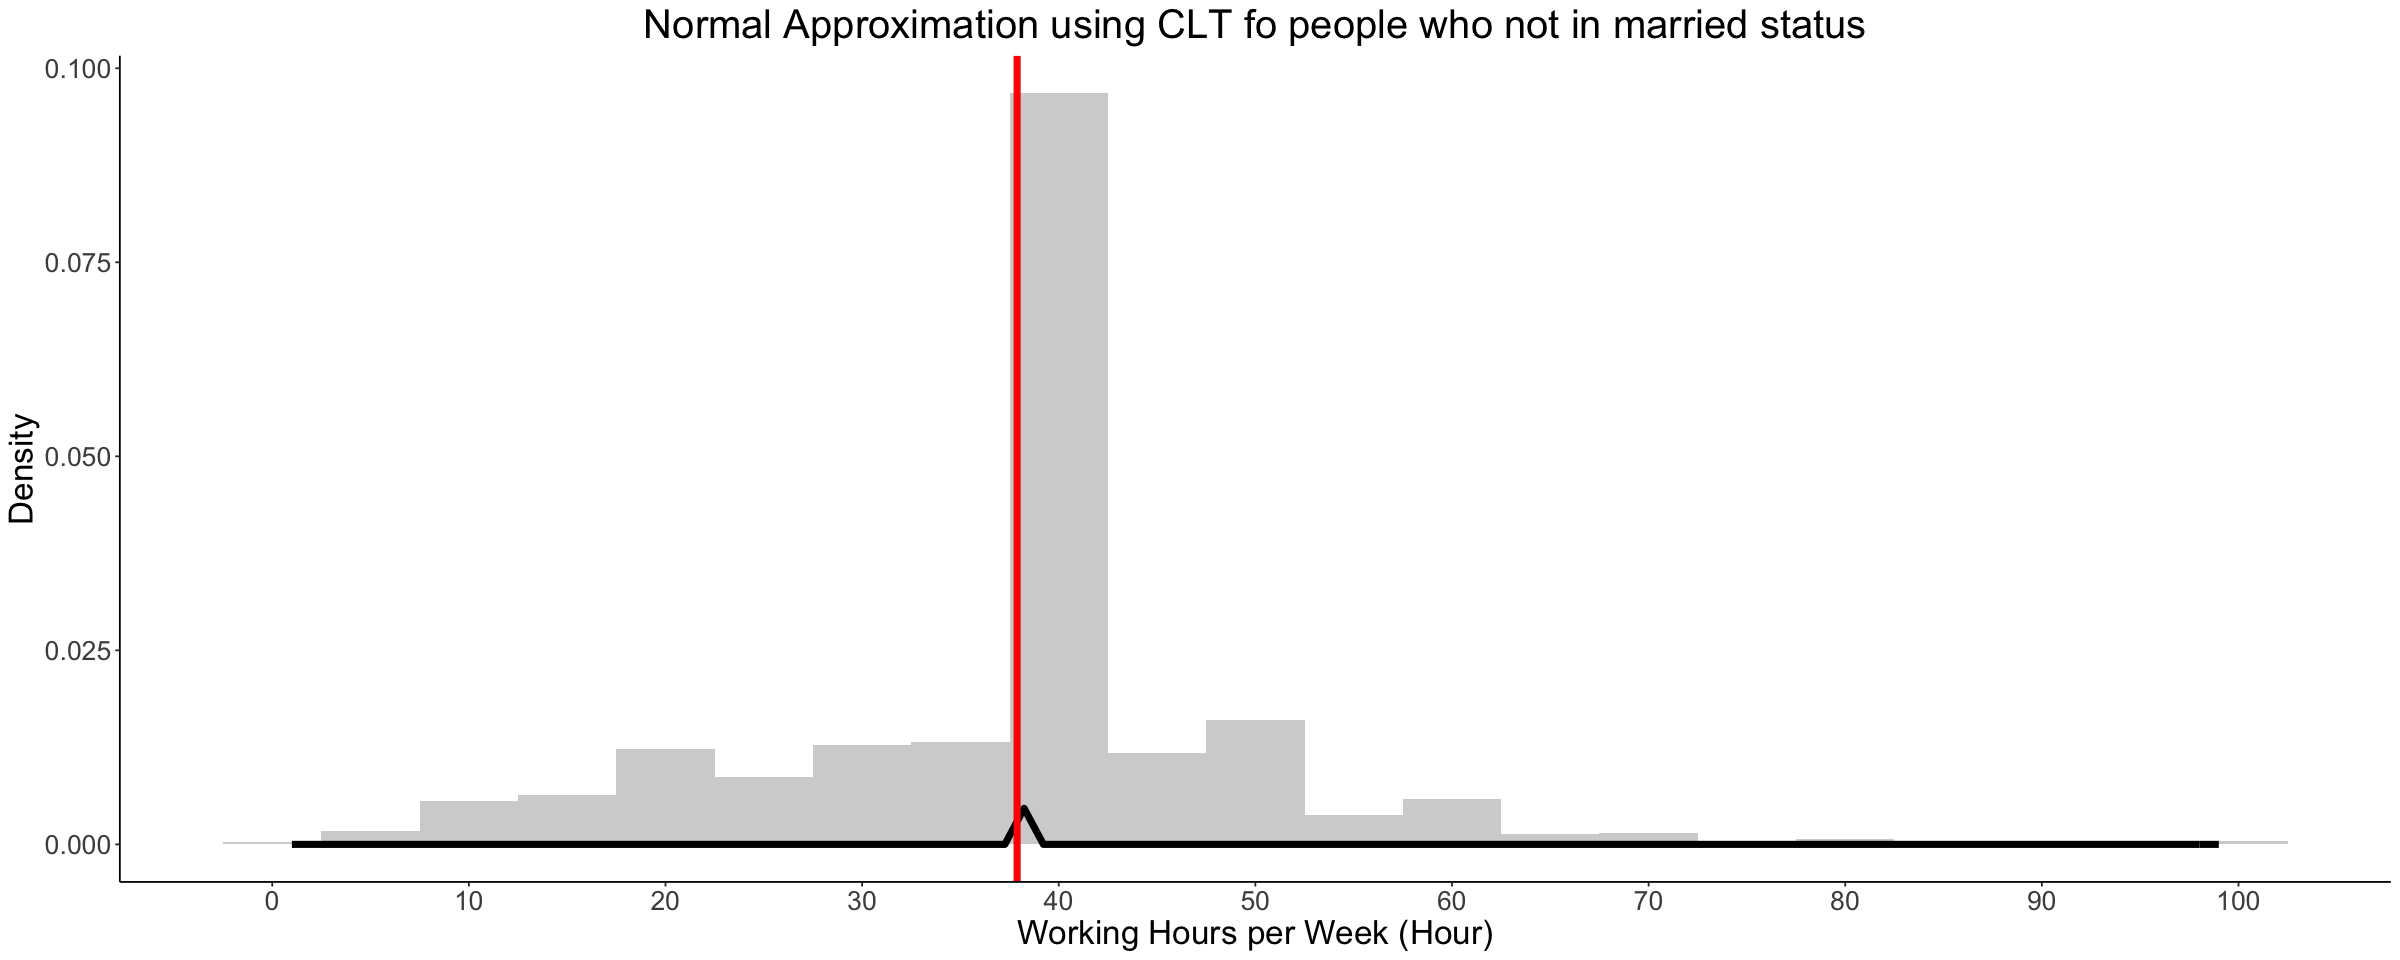

In [92]:
not_married_plot

<center><em>Figure 18: CLT Graph</em></center>

**Hypothesis Testing**

Now let's conduct our hypothesis test. To do this, we will be using the `oneway.test` function.

- $H_0$ : there is no difference between the working hours of people that are married, not married and married but seperated
- $H_A$ : there is a difference between the working hours of people that are married, not married and married but seperated
- Significant Level: 0.05

**Welch ANOVA Test for Marital Status**

In [93]:
oneway.test(hours_per_week ~ marital_status, data = data_ms, var.equal = FALSE)


	One-way analysis of means (not assuming equal variances)

data:  hours_per_week and marital_status
F = 781.51, num df = 2.0, denom df = 4125.6, p-value < 2.2e-16


**P-Value**

The p-value is < $2.2*10^{-16}$, so we can reject the null hypothesis. This means that there is a significant difference somewhere between working hours of people who are married, unmarried, or married but separated. Thus marital status impacts number of hours worked per week. 

### Mean Working Hours Based on Workclass

When looking at a person's workclass, we decided to compare those that work in the public sector, private sector, are self employed and those that volunteer. The dataset also has some other categories which are: and other "?" and "Never-worked", but for our analysis, we will not be looking at those because we are unsure about what "Never-worked" means in as the people categorized as this do have working hours. Also "?" is undefined and we would like to work with data points with known workclasses. To conduct this test, we are going to use the Welch ANOVA method because we are comparing more than two independent groups and our groups have different variances.

First we are going to make a copy of our original dataset so we can edit it. We are then going to filter out the unwanted categories and group the other ones into the chosen categories.

In [94]:
data_wc <- data %>%
    filter(work_class != "?") %>%
    filter(work_class != "Never-worked")

data_wc$work_class[data_wc$work_class == "Federal-gov" |
                   data_wc$work_class == "Local-gov" |
                   data_wc$work_class == "State-gov"] = "Public"

data_wc$work_class[data_wc$work_class == "Self-emp-inc" |
                   data_wc$work_class == "Self-emp-not-inc"] = "Self Employed"

data_wc$work_class[data_wc$work_class == "Without-pay"] = "Volunteer"

Below, we are constructing a boxplot to display the data of hours worked per week based on our new categorization of workclass. 

In [95]:
p <- data_wc %>%
    ggplot(aes(x = work_class, y = hours_per_week, color = work_class)) +
    geom_boxplot() +
    xlab("Work Class") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Workclass") +
    plot_config +
    boxplot_scale

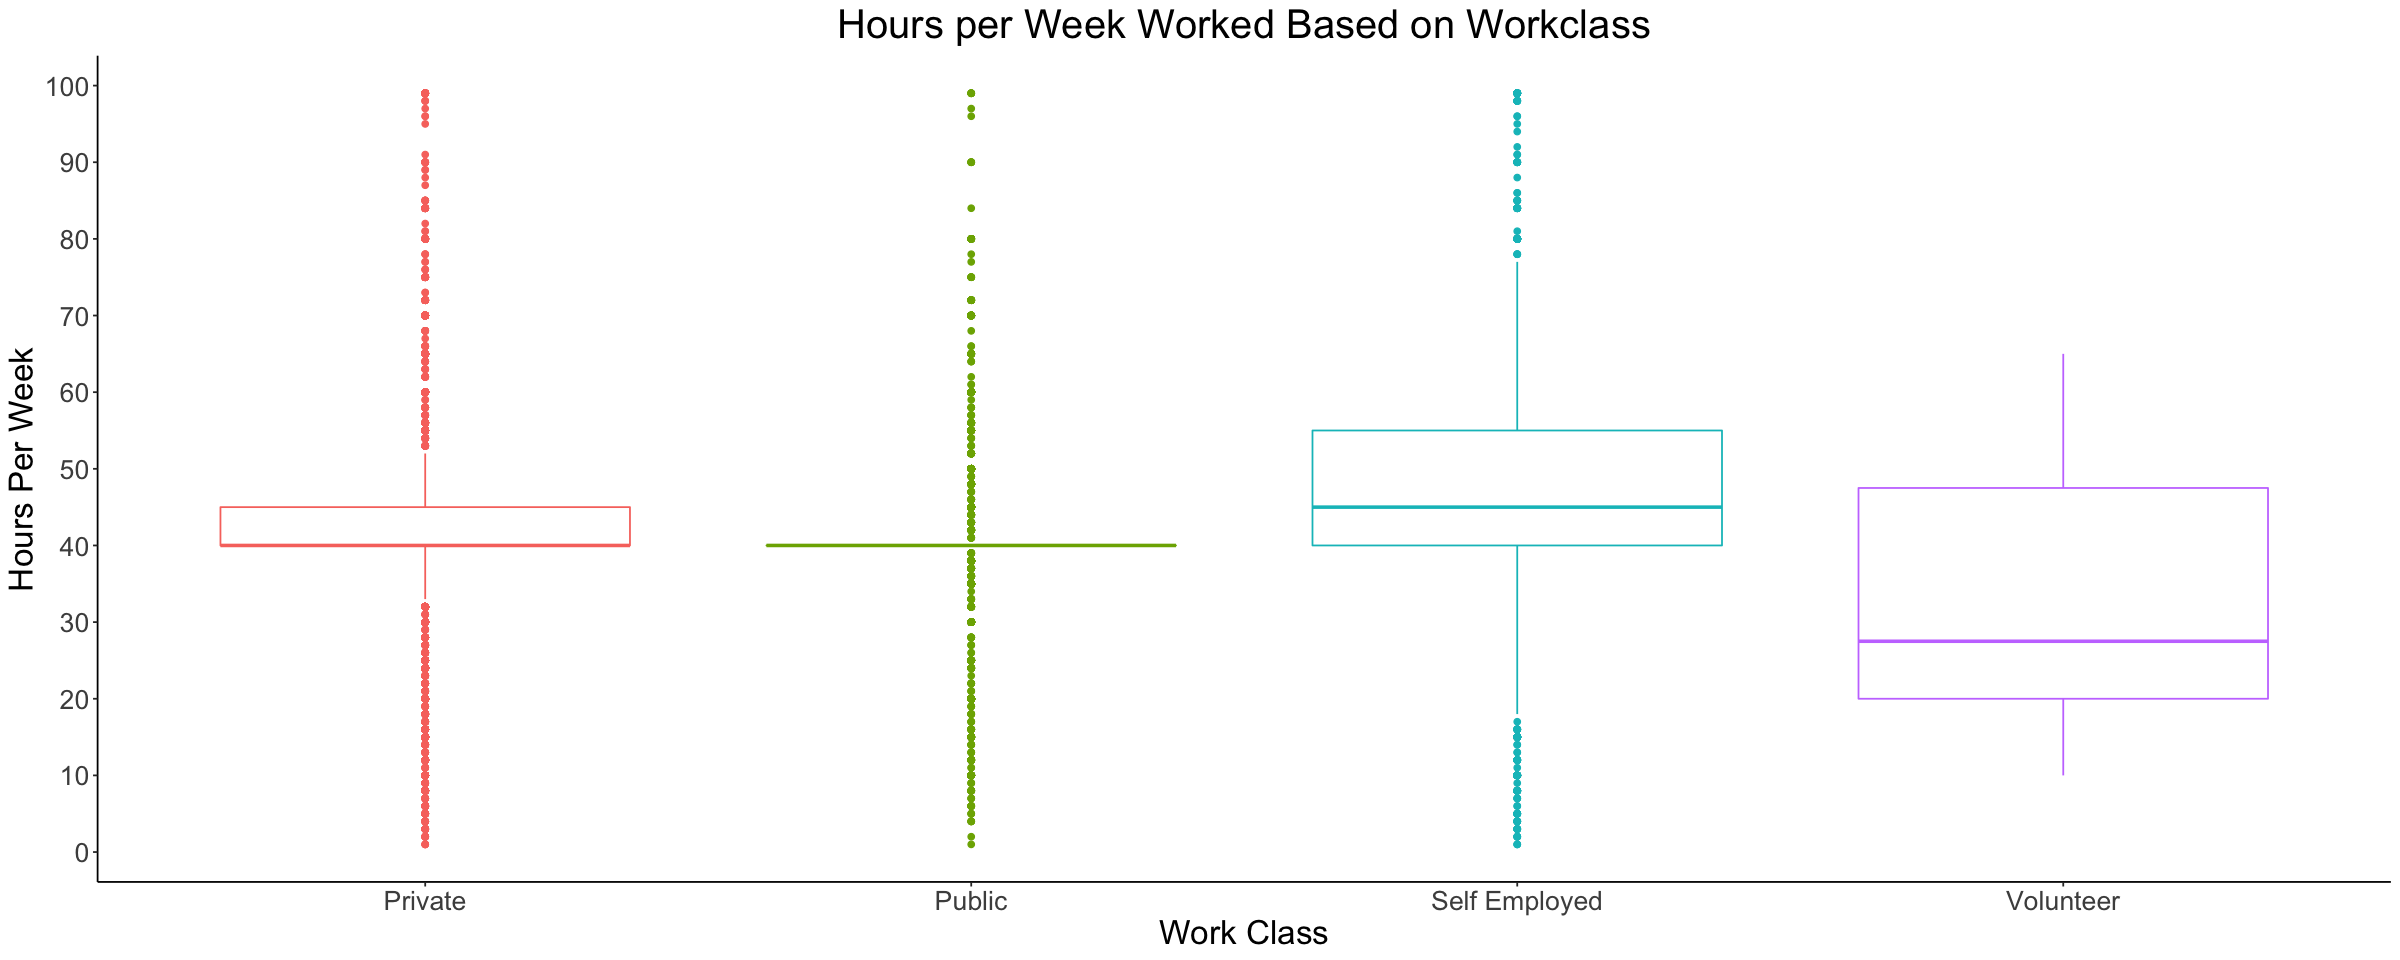

In [96]:
p

<center><em>Figure 19: Box-plot of Workclass</em></center>

**Bootstrapping Method**

Now we will use boostrapping to construct confidence intervals for each group in our categorical variable. For this category we are choosing not to do the asymptotic method because the CLT may not apply to the volunteer group due to the lack of samples. Table 19 shows that the volunteer group only has 14 observations which is not a very large sample size.

Below we are computing the number of observations for each group so we can determine the size of our sample for bootstrapping.

**Computing n**

In [97]:
data_wc %>% group_by(work_class) %>% summarise(n = n())

work_class,n
<chr>,<int>
Private,22696
Public,4351
Self Employed,3657
Volunteer,14


<center><em>Table 19: Computing n</em></center>

Below we are computing the true mean of each group from our dataset.

In [126]:
compare_hour_low_hi_wc <- data_wc |> 
    group_by(work_class) |> 
    summarize(mean_hours_per_week=mean(hours_per_week)) |>
    pull()

private_mean_s <- compare_hour_low_hi_wc[1]
public_mean_s <- compare_hour_low_hi_wc[2]
self_mean_s <- compare_hour_low_hi_wc [3]
volunteer_mean_s <- compare_hour_low_hi_wc [4]

Below we are taking bootstrap samples, grouping them, computing the mean working hours for each group and selecting the `work_class` and `mean_working_hour` columns

In [99]:
private_bootstrap <- data_wc %>%
    filter(work_class == "Private") %>%
    rep_sample_n(reps= 1000, size = 22696, replace = TRUE)

public_bootstrap <- data_wc %>%
    filter(work_class == "Public") %>%
    rep_sample_n(reps= 1000, size = 4351, replace = TRUE)

self_bootstrap <- data_wc %>%
    filter(work_class == "Self Employed") %>%
    rep_sample_n(reps= 1000, size = 3657, replace = TRUE)

volunteer_bootstrap <- data_wc %>%
    filter(work_class == "Volunteer") %>%
    rep_sample_n(reps= 1000, size = 14, replace = TRUE)

Now we are computing the mean hours per week for each replication and selecting the relevent columns.

In [100]:
private_mean <- private_bootstrap %>%
    group_by(replicate) %>%
    summarize(mean_working_hour = mean(hours_per_week)) %>%
    mutate(work_class = "Private") %>%
    select(work_class, mean_working_hour)

public_mean <- public_bootstrap %>%
    group_by(replicate) %>%
    summarize(mean_working_hour = mean(hours_per_week)) %>%
    mutate(work_class = "Public") %>%
    select(work_class, mean_working_hour)

self_mean <- self_bootstrap %>%
    group_by(replicate) %>%
    summarize(mean_working_hour = mean(hours_per_week)) %>%
    mutate(work_class = "Self-Employed") %>%
    select(work_class, mean_working_hour)

volunteer_mean <- volunteer_bootstrap %>%
    group_by(replicate) %>%
    summarize(mean_working_hour = mean(hours_per_week)) %>%
    mutate(work_class = "Volunteer") %>%
    select(work_class, mean_working_hour)

We are now calculating 90% Confidence Intervals for each of the categories.

In [134]:
ci_6 <- private_mean |>
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

ci_7 <- public_mean |>
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

ci_8 <- self_mean |>
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

ci_9 <- volunteer_mean |>
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))

Below we are creating plots of our bootstrapped data and overlaying the confidence intervals from above and the true mean.

In [165]:
ci_plot_6 <- private_mean |> 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.025) +
    annotate("rect", xmin = ci_6$ci_lower, xmax = ci_6$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = private_mean_s,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People who work in the private sector",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config

ci_plot_7 <- public_mean |> 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.025) +
    annotate("rect", xmin = ci_7$ci_lower, xmax = ci_7$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = public_mean_s,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People who work in the public sector",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config

ci_plot_8 <- self_mean |> 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.025) +
    annotate("rect", xmin = ci_8$ci_lower, xmax = ci_8$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = self_mean_s,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People who are self-employed",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config

ci_plot_9 <- volunteer_mean |> 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.5) +
    annotate("rect", xmin = ci_9$ci_lower, xmax = ci_9$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = volunteer_mean_s,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People who volunteer",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config

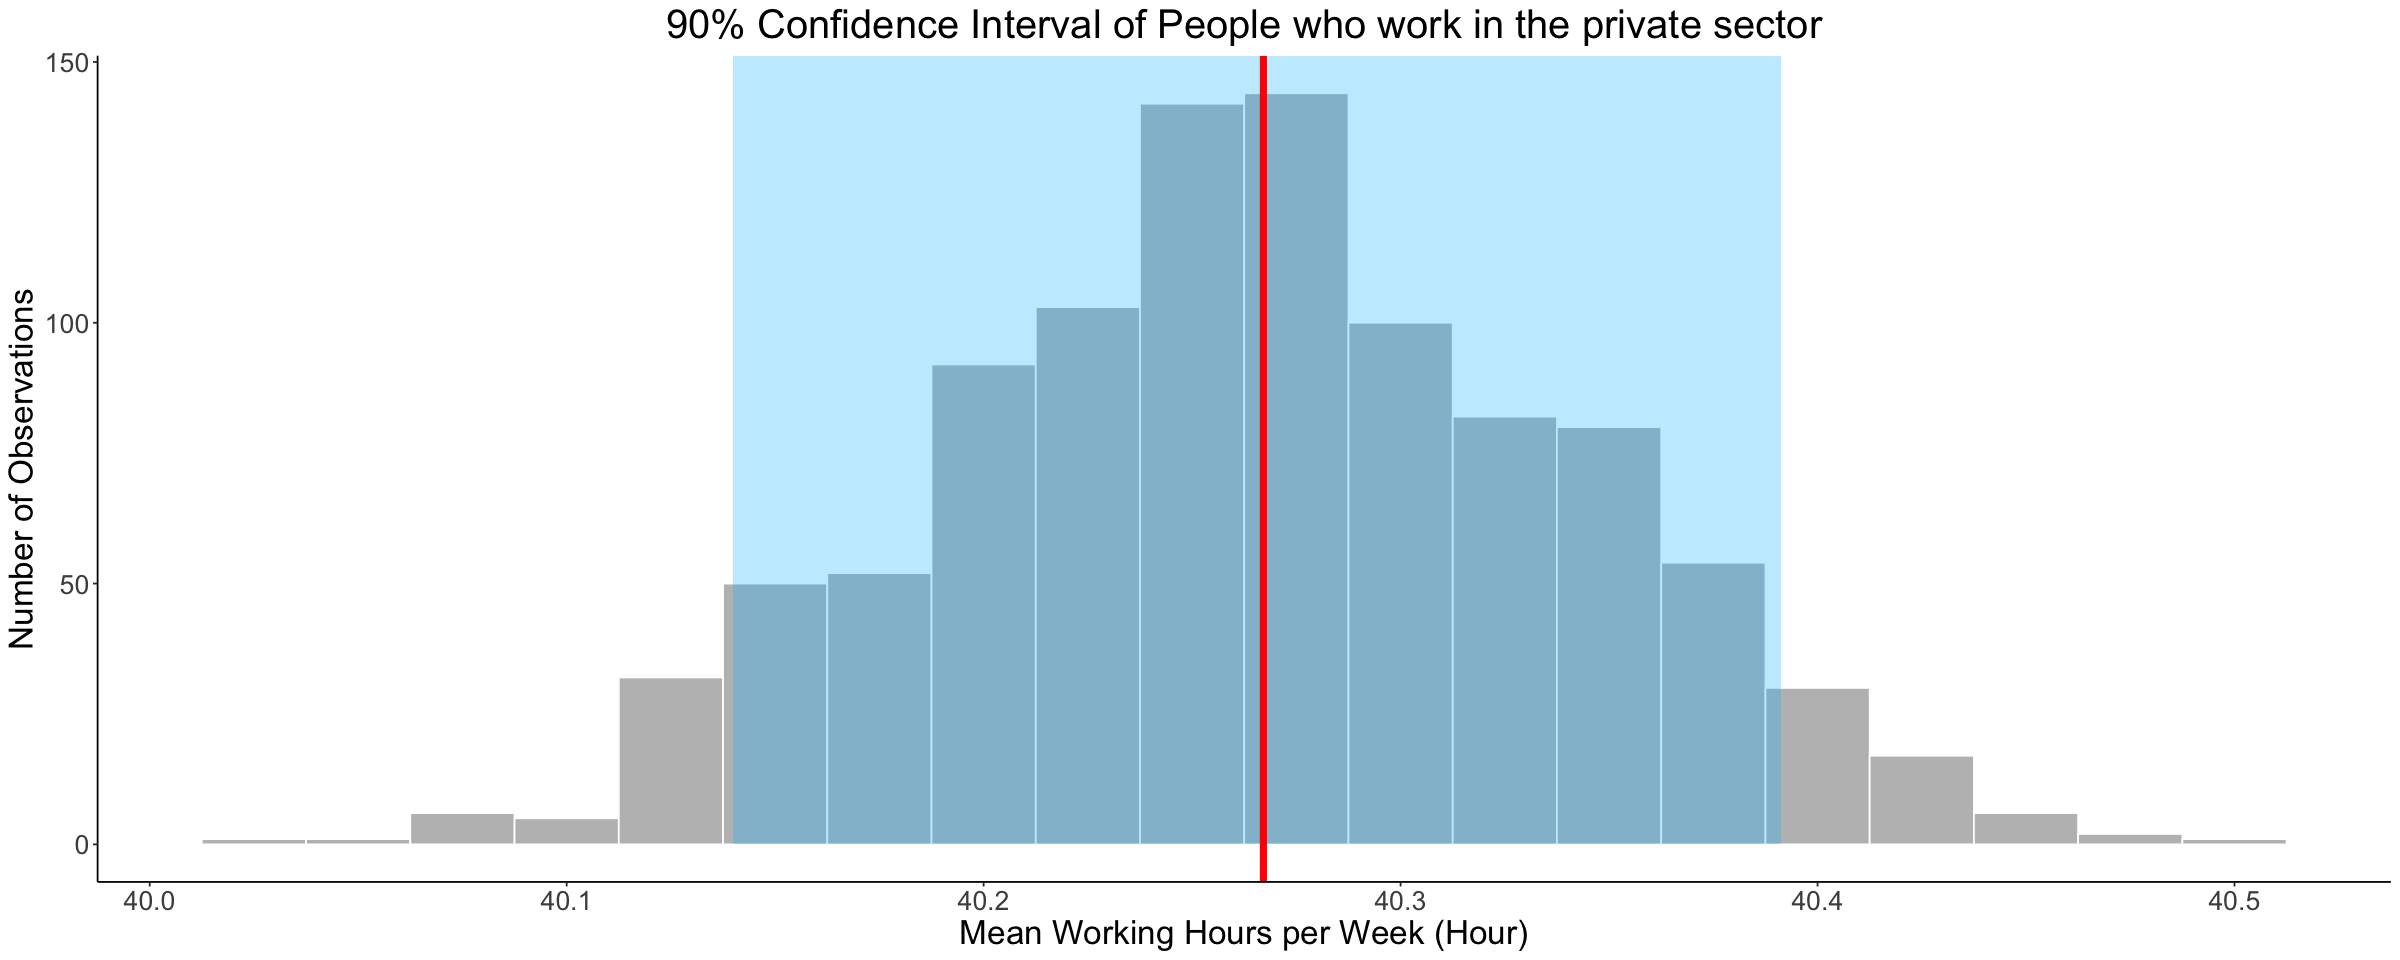

In [159]:
ci_plot_6

<center><em>Figure 20: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootsrapping Method of People in the Private Sector**

In [160]:
ci_6

ci_lower,ci_upper
<dbl>,<dbl>
40.13984,40.39124


<center><em>Table 20: 90% Confidence Interval Table</em></center>

Table 20 means that we are 90% confident that the true mean working hours of people who work in the private sector is between 40.13984 and 40.39124. This is quite a small range and shows that private sector workers get more consistant hours.

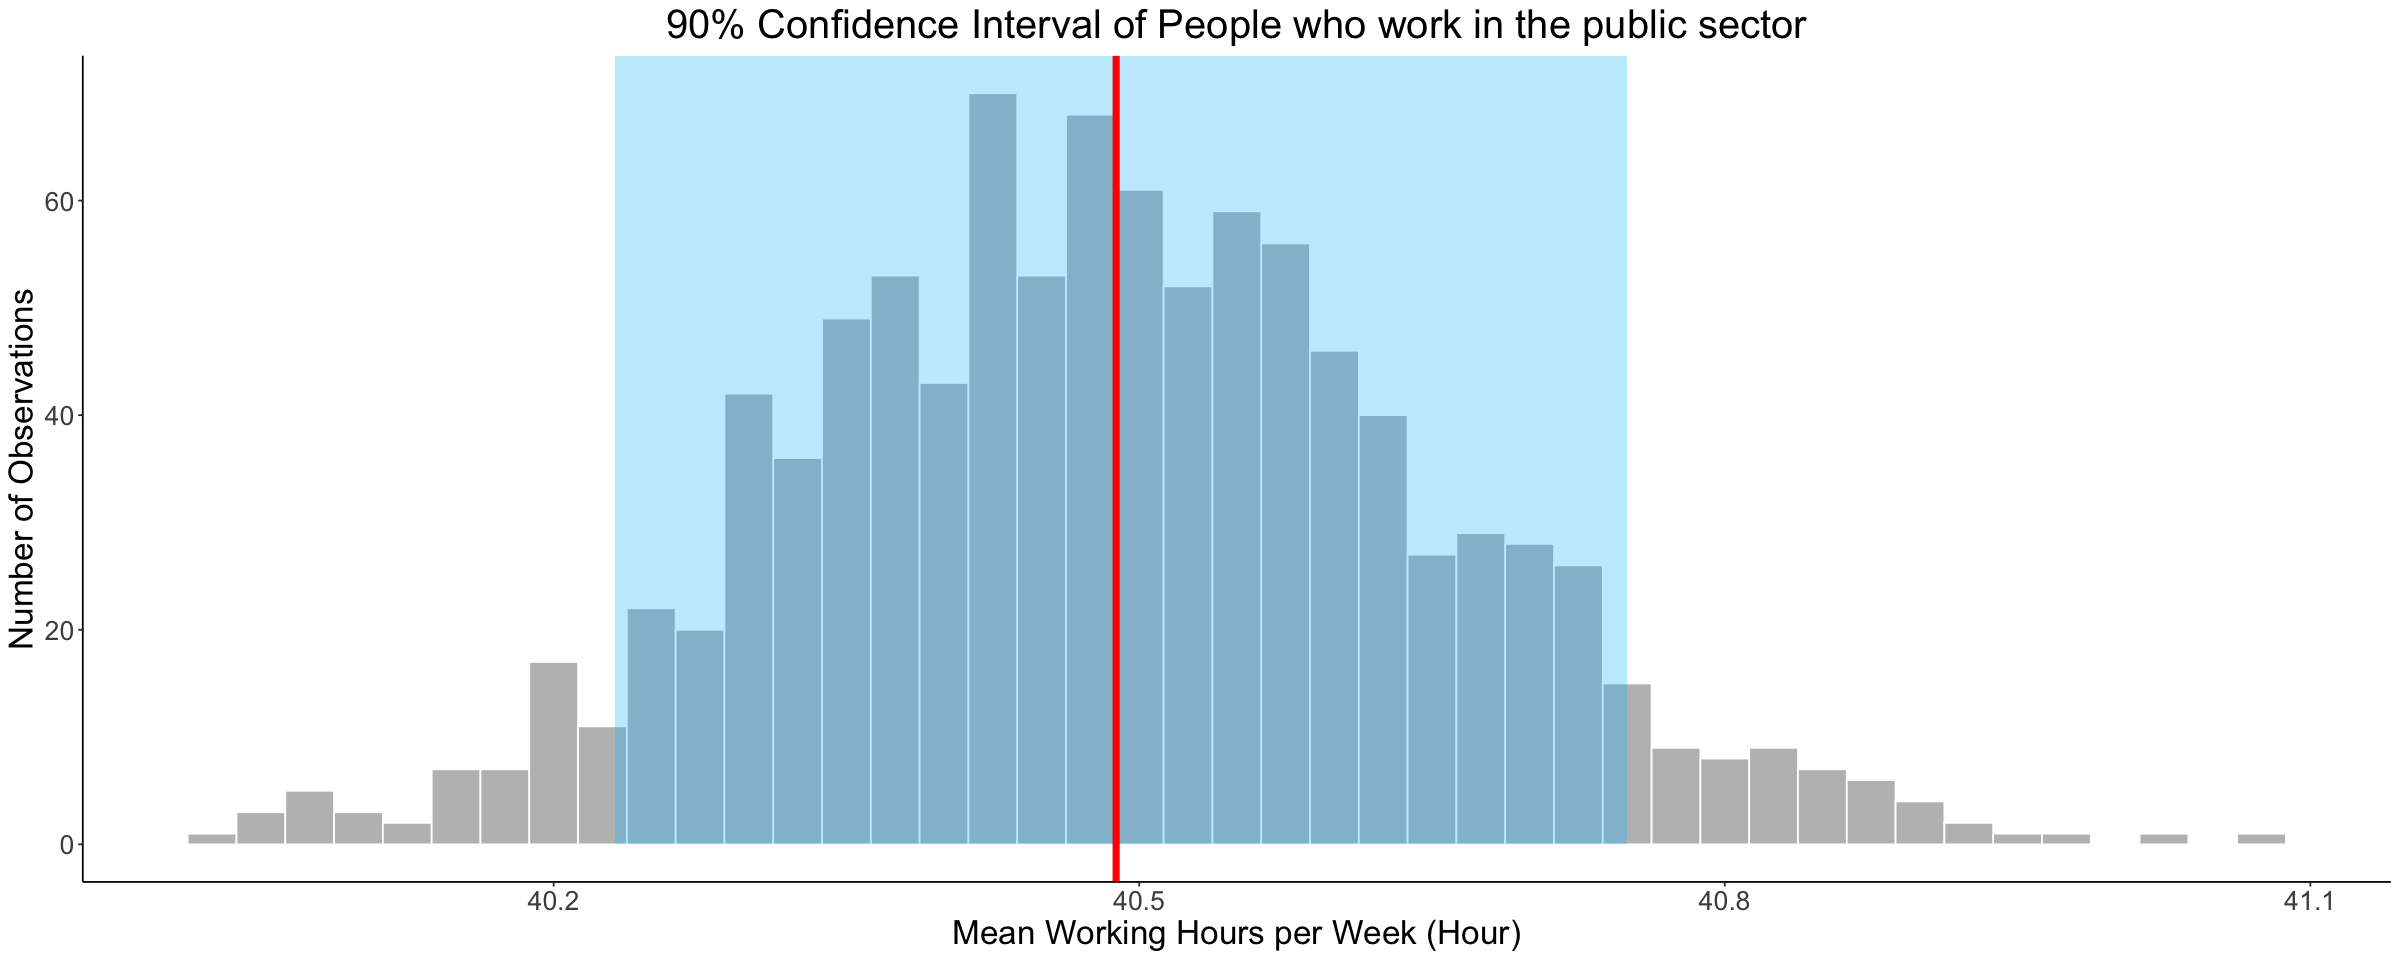

In [161]:
ci_plot_7

<center><em>Figure 21: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootsrapping Method of People in the Public Sector**

In [139]:
ci_7

ci_lower,ci_upper
<dbl>,<dbl>
40.23158,40.74992


<center><em>Table 21: 90% Confidence Interval Table</em></center>

Table 21 means that we are 90% confident that the true mean working hours of people who work in the public sector is between 40.23158 and 40.74992. This is quite a small range and shows that public sector workers get more consistant hours.

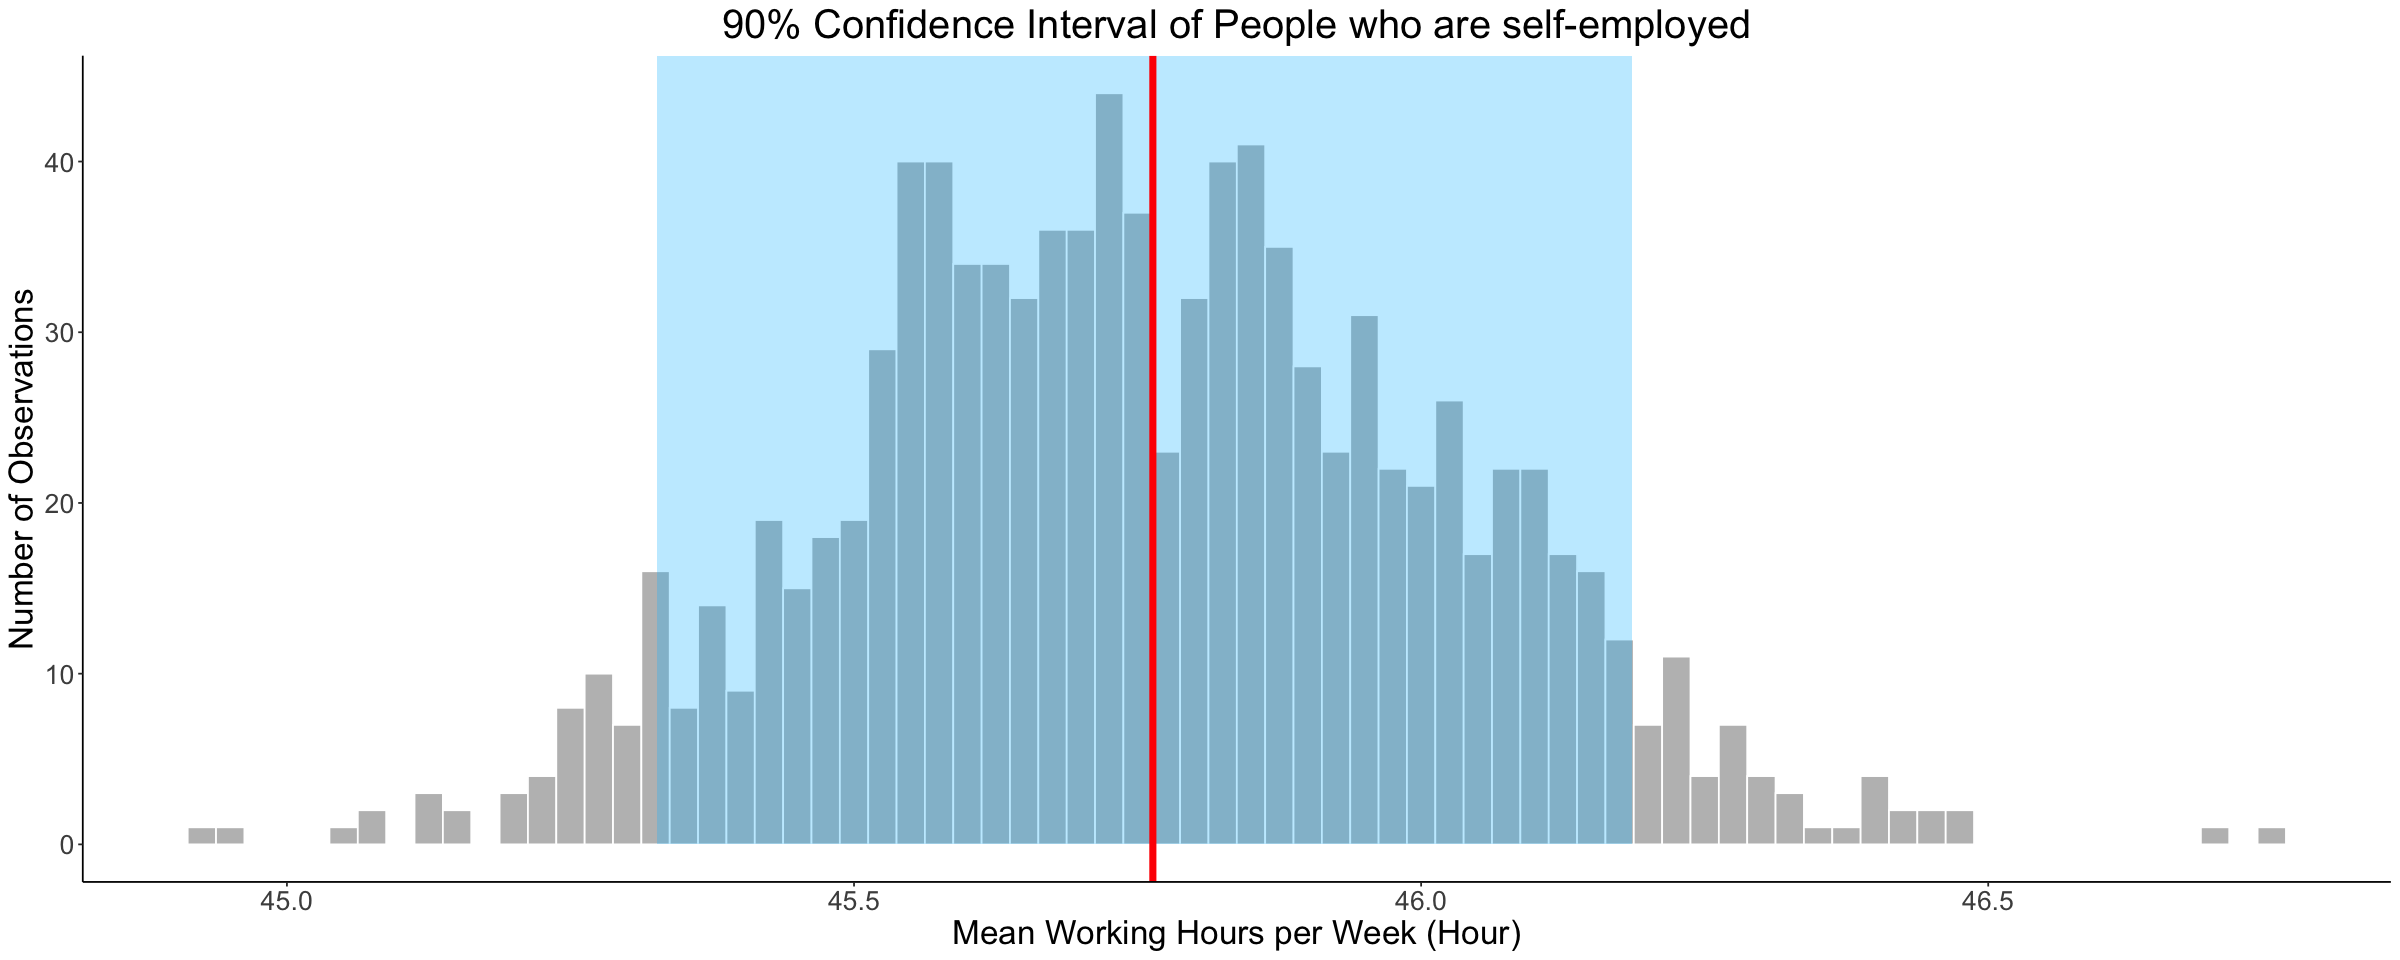

In [163]:
ci_plot_8

<center><em>Figure 22: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootsrapping Method of People that are Self-Employed**

In [141]:
ci_8

ci_lower,ci_upper
<dbl>,<dbl>
45.32646,46.18599


<center><em>Table 22: 90% Confidence Interval Table</em></center>

Table 22 means that we are 90% confident that the true mean working hours of people who are self-employed is between 45.32646 and 46.18599. This is quite a small range, but compared to the public and private sector hours, self-employed people work more.

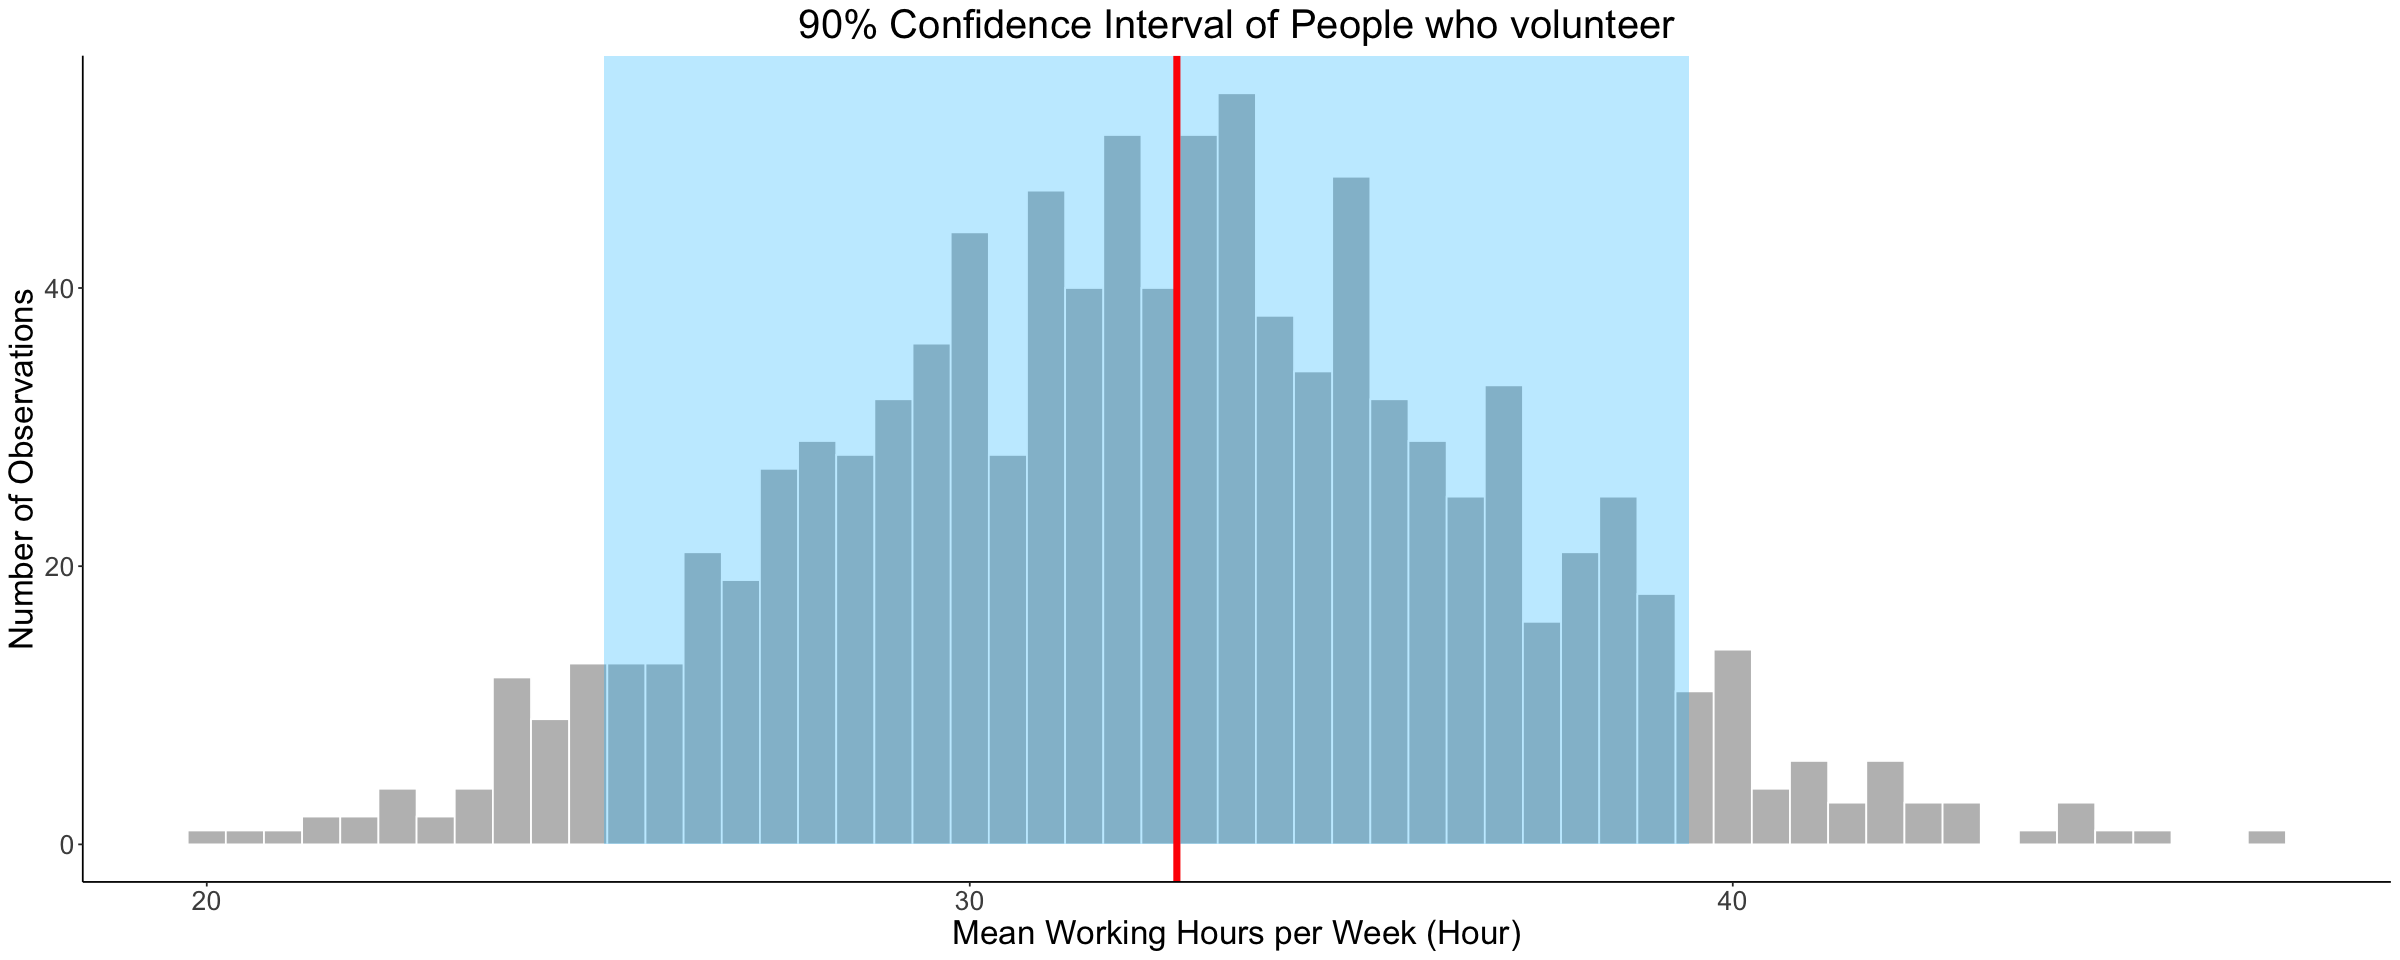

In [166]:
ci_plot_9

<center><em>Figure 23: 90% Confidence Interval</em></center>

**90% Confidence Interval for Bootsrapping Method of People that Volunteer**

In [143]:
ci_9

ci_lower,ci_upper
<dbl>,<dbl>
25.21071,39.43214


<center><em>Table 23: 90% Confidence Interval Table</em></center>

Table 23 means that we are 90% confident that the true mean working hours of people who volunteer is between 25.21071 and 39.43214. This is a bit more varied compared to the above three groups and it is expected because volunteer work is not paid.

**Hypothesis Testing**

- $H_0$ : there is no difference between the means of people who work in private sector, public sector, are self-employed or volunteer
- $H_A$ : there is a difference between the means of people who work in private sector, public sector, are self-employed or volunteer
- Significant Level: 0.05

Below we are running our Welch ANOVA test by first combining each of the four groups into one dataframe, then running a `oneway` test with `var.equal = FALSE` because the variance of each group is different.

**Welch ANOVA Test for Workclass**

In [112]:
oneway.test(hours_per_week ~ work_class, data = data_wc, var.equal = FALSE)


	One-way analysis of means (not assuming equal variances)

data:  hours_per_week and work_class
F = 131.75, num df = 3.000, denom df = 64.686, p-value < 2.2e-16


**P-Value**

Our p-value is < $2.2*10^{-16}$, so we can reject the null hypothesis. This means that there is a significant difference somewhere between the mean working hours of people who work in the private sector, public sector, self-employment or volunteers. Thus workclass impacts number of hours worked per week. 

## Discussion

In this report, we tested the question of whether education level, marital status, and workclass impacts number of hours worked per week. We first looked at the descriptive measures of mean and standard deviation for these variables. We then found confidence intervals using bootstrapping and asymptotic methods, and conducted hypothesis testing which revealed that marital status and workclass have an impact on working hours

As we found, level of education has a significant impact on number of hours worked per week with the categorized education as less than high-school and more than high-school. There are various implications of this finding: for instance, students can take it into consideration when deciding their education pursuit. Future research should delve into more categories for level of education, such as the income per hour worked and job position to allow students to grasp a more detailed picture on education impact on working life.

We divided workclass into publicly employed, privately employed, self-employed and volunteers, and found that workclass has an impact on number of hours worked per week. However this analysis is limited because it does not tell us where this significant difference lies. Nonetheless, this finding opens the door for future research on the impact of different types of jobs on working hours. It also has real-world implications in helping people make career decisions on the basis of working hours, amongst other factors like income and job demand.

We also found that marital status has an impact on number of hours worked per week. This analysis is also limited because it does not tell us where the significant difference lies. However it does show us that personal life and experiences can have an impact on our professional life, and this finding can further be explored to the benefit of both employers and employees. Moreover future research can also study work-life balance satisfaction for people with different marital statuses. 

In conclusion we see that working hours can be affected by all three variables tested in this study, education level, workclass, and marital status. 

## References

Kohavi, R., &amp; Becker, B. (1996, May 1). Adult Data Set. Retrieved 2021, from https://archive.ics.uci.edu/ml/datasets/adult. This database was found with assistance of:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Kim, H., Suh, B. S., Lee, W. C., Jeong, H. S., Son, K. H., Nam, M. W., & Kim, H. C. (2019). The association between long working hours and marital status change: middle-aged and educated Korean in 2014-2015. Annals of occupational and environmental medicine, 31, e3. https://doi.org/10.35371/aoem.2019.31.e3

Kim, Hyunil MD; Lee, Woncheol MD; Lee, Yesung MD Association of Long Working Hours With Marital Status Changes in South Korea, Journal of Occupational and Environmental Medicine: October 2021 - Volume 63 - Issue 10 - p e689-e693
doi: 10.1097/JOM.0000000000002338